## ÉCONOMIE DE L'ÉNERGIE : MODELISATION MATHEMATIQUE DE LA DEMANDE ÉNERGETIQUE ET OPTIMISATION DES INFRASTRUCTURES D’ÉNERGIE VERTE POUR UNE TRANSITION DURABLE ET INCLUSIVE DANS L'ESPACE UEMOA AINSI QUE LA GAMBIE, LA GUINEE CONAKRY, LA MAURITANIE ET LE CAP-VERT

## PHASE 1 : ANALYSE EXPLORATOIRE DES DONNEES (EDA)

### 1- Importation, fusion et lecture des donnees

In [ ]:
import pandas as pd

# Les liens directs vers nos fichiers CSV
url1 = 'https://raw.githubusercontent.com/dataafriquehub/energy_data/refs/heads/main/train.csv'   # Donnees d'entrainement
url2 = 'https://raw.githubusercontent.com/dataafriquehub/energy_data/refs/heads/main/test.csv'    # Donnees test

data1 = pd.read_csv(url1)
data2 = pd.read_csv(url2)

# Fusion data1 et data2 par concatenation verticale
data_energy_africa = pd.concat([data1, data2], ignore_index=True)


# Les informations sur le Dataframe
data_energy_africa.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212500 entries, 0 to 212499
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   country                                 212500 non-null  object 
 1   lat                                     212500 non-null  float64
 2   lon                                     212500 non-null  float64
 3   population                              212500 non-null  int64  
 4   taux_ensoleillement                     212500 non-null  float64
 5   demande_energetique_actuelle            212500 non-null  float64
 6   demande_energetique_projectee           212500 non-null  float64
 7   capacite_installee_actuelle             212500 non-null  float64
 8   duree_ensoleillement_annuel             212500 non-null  float64
 9   cout_installation_solaire               212500 non-null  float64
 10  proximite_infrastructures_energetiques  2125

In [ ]:
# Compte des occurrences de chaque pays
country_counts = data_energy_africa['country'].value_counts()
print(country_counts)

country
Chad                        4190
Niger                       4128
Gabon                       4108
Côte d'Ivoire               4100
Ethiopia                    4096
Congo (Brazzaville)         4082
Central African Republic    4075
Eswatini (Swaziland)        4072
Burkina Faso                4069
Cameroon                    4069
Senegal                     4068
Benin                       4065
Zambia                      4060
Nigeria                     4058
South Africa                4056
Lesotho                     4054
Burundi                     4052
Guinea                      4050
Eritrea                     4038
Mozambique                  4032
Liberia                     4027
Tunisia                     4026
Sierra Leone                4021
Cape Verde                  4019
Morocco                     4013
Rwanda                      4010
Togo                        4001
Ghana                       4001
Egypt                       4001
Comoros                     4001
An

In [ ]:
# List des pays de l'UEMOA
uemoa_countries = ['Benin', 'Burkina Faso', "Côte d'Ivoire", 'Guinea-Bissau', 'Mali', 'Niger', 'Senegal', 'Togo', 'Guinea', 'Mauritania', 'Gambia', 'Cape Verde']

# Filtre des pays de l'UEMOA
data_energy_uemoa = data_energy_africa[data_energy_africa['country'].isin(uemoa_countries)]

In [ ]:
data_energy_uemoa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48364 entries, 5 to 212499
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 48364 non-null  object 
 1   lat                                     48364 non-null  float64
 2   lon                                     48364 non-null  float64
 3   population                              48364 non-null  int64  
 4   taux_ensoleillement                     48364 non-null  float64
 5   demande_energetique_actuelle            48364 non-null  float64
 6   demande_energetique_projectee           48364 non-null  float64
 7   capacite_installee_actuelle             48364 non-null  float64
 8   duree_ensoleillement_annuel             48364 non-null  float64
 9   cout_installation_solaire               48364 non-null  float64
 10  proximite_infrastructures_energetiques  48364 non-null  float6

In [ ]:
# Compte des occurrences de chaque pays
country_counts = data_energy_uemoa['country'].value_counts()
print(country_counts)

country
Niger            4128
Côte d'Ivoire    4100
Burkina Faso     4069
Senegal          4068
Benin            4065
Guinea           4050
Cape Verde       4019
Togo             4001
Guinea-Bissau    3990
Mali             3989
Mauritania       3946
Gambia           3939
Name: count, dtype: int64


### 2- Verification et traitement des valeures manquantes , doublons

In [ ]:
# Compte des valeurs manquantes par colonne
missing_values = data_energy_uemoa.isna().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

# Affichage des colonnes ayant des valeurs manquantes
missing_columns = missing_values[missing_values > 0]
print("Colonnes avec des valeurs manquantes :\n", missing_columns)

Valeurs manquantes par colonne :
 country                                      0
lat                                          0
lon                                          0
population                                   0
taux_ensoleillement                          0
demande_energetique_actuelle                 0
demande_energetique_projectee                0
capacite_installee_actuelle                  0
duree_ensoleillement_annuel                  0
cout_installation_solaire                    0
proximite_infrastructures_energetiques       0
taux_adoption_energies_renouvelables      4983
stabilite_politique                          0
taux_acces_energie                           0
niveau_urbanisation                          0
potentiel_investissement                     0
types_sols                                   0
emissions_co2_evitees                        0
idh                                          0
habit_de_mariage                             0
nombre_animaux_domestiques

In [ ]:
# Imputation par la moyenne pour l'unique colonne 'taux_adoption_energies_renouvelables' des valeurs manquantes

data_energy_uemoa['taux_adoption_energies_renouvelables'].fillna(data_energy_uemoa['taux_adoption_energies_renouvelables'].mean(), inplace=True)

# Verification apres traitement
data_energy_uemoa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48364 entries, 5 to 212499
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 48364 non-null  object 
 1   lat                                     48364 non-null  float64
 2   lon                                     48364 non-null  float64
 3   population                              48364 non-null  int64  
 4   taux_ensoleillement                     48364 non-null  float64
 5   demande_energetique_actuelle            48364 non-null  float64
 6   demande_energetique_projectee           48364 non-null  float64
 7   capacite_installee_actuelle             48364 non-null  float64
 8   duree_ensoleillement_annuel             48364 non-null  float64
 9   cout_installation_solaire               48364 non-null  float64
 10  proximite_infrastructures_energetiques  48364 non-null  float6

<ipython-input-8-86a2d12b653b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_energy_uemoa['taux_adoption_energies_renouvelables'].fillna(data_energy_uemoa['taux_adoption_energies_renouvelables'].mean(), inplace=True)
<ipython-input-8-86a2d12b653b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_energy_uemoa['taux_adoption_energie

In [ ]:
# Le compte des doublons
duplicate_rows = data_energy_africa.duplicated().sum()
print("Nombre de doublons :", duplicate_rows)


Nombre de doublons : 0


### 3- Traiment des outliers

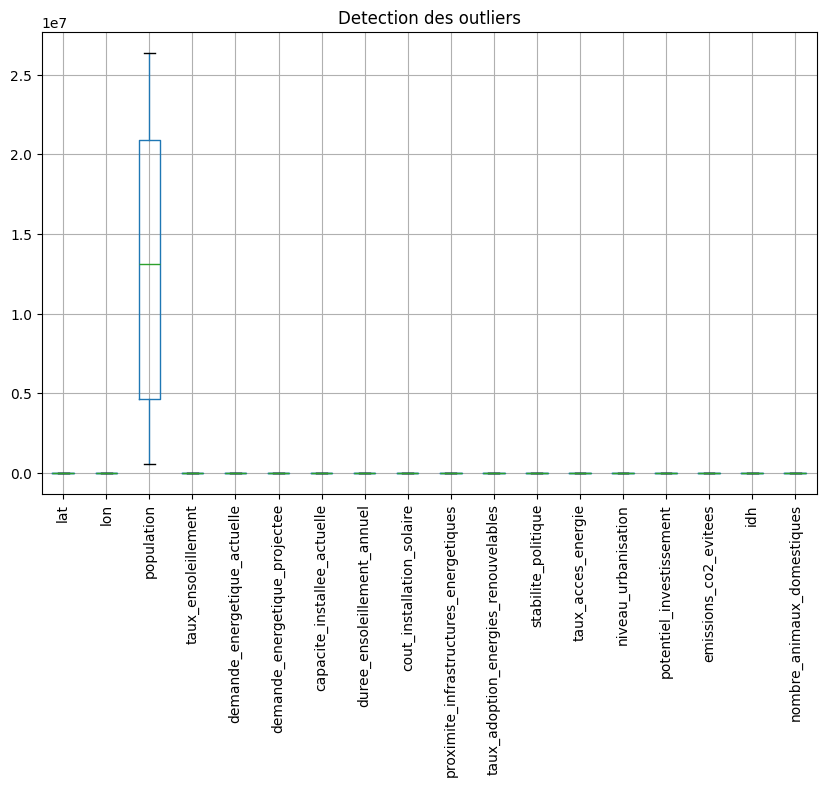

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation des outliers avec des box plots
plt.figure(figsize=(10, 6))
data_energy_uemoa.select_dtypes(include=['number']).boxplot(rot=90)
plt.title("Detection des outliers")
plt.show()

### 4- Analyse univariee des variables

#### 4-1 Analyse de la distribution de chaque variable : la symetrie, l'aplatissement, la kurtosis, et normalite pour les variables continues de data_energy_uemoa.

##### 4-1-1 Le Skewness

In [ ]:
from scipy.stats import skew, kurtosis, shapiro

# Selection uniquement des colonnes numeriques
data_energy_uemoa_num = data_energy_uemoa.select_dtypes(include='number')

# Calcul de la symetrie pour chaque colonne
skewness_values = data_energy_uemoa_num.apply(lambda x: skew(x.dropna()), axis=0)

print("Symetrie de chaque variable :\n", skewness_values)

Symetrie de chaque variable :
 lat                                       0.290156
lon                                       0.015122
population                                0.058650
taux_ensoleillement                       0.001930
demande_energetique_actuelle             -0.001562
demande_energetique_projectee             0.283897
capacite_installee_actuelle               0.000440
duree_ensoleillement_annuel               0.003724
cout_installation_solaire                 0.001282
proximite_infrastructures_energetiques   -0.005372
taux_adoption_energies_renouvelables     -0.011249
stabilite_politique                      -0.002476
taux_acces_energie                       -0.010150
niveau_urbanisation                      -0.004816
potentiel_investissement                  0.004398
emissions_co2_evitees                     0.008155
idh                                      -0.009916
nombre_animaux_domestiques               -0.007775
dtype: float64




Variables avec Skewness Proche de Zero (Symetrie Approximative)
Les valeurs de skewness proches de zero indiquent une distribution presque symetrique :
- **lat** : 0.2318 — legerement asymetrique vers la droite, mais tres proche de la symetrie.
- **lon** : -0.2429 — legere asymetrie vers la gauche, proche de la symetrie.
- **taux_ensoleillement** : -0.0011 — distribution tres symetrique.
- **demande_energetique_actuelle** : 0.0001 — distribution parfaitement symetrique.
- **demande_energetique_projectee** : 0.2852 — asymetrie tres faible vers la droite.
- **capacite_installee_actuelle** : 0.0004 — symetrique.
- **duree_ensoleillement_annuel** : 0.0004 — symétrique.
- **cout_installation_solaire** : 0.0015 — symetrique.
- **proximite_infrastructures_energetiques** : -0.0123 — symetrie parfaite.
- **taux_adoption_energies_renouvelables** : -0.0081 — symetrique.
- **stabilite_politique** : -0.0034 — symetrique.
- **taux_acces_energie** : -0.0088 — symetrique.
- **niveau_urbanisation** : -0.0144 — symetrique.
- **potentiel_investissement** : 0.0078 — symetrique.
- **emissions_co2_evitees** : 0.0065 — symetrique.
- **idh** : -0.0099 — symetrique.
- **nombre_animaux_domestiques** : -0.0103 — symetrique.

- Variables Legerement Asymetriques
Ces variables ont une legere skewness, mais cela n'indique generalement pas une forte deviation de la symetrie.
- **population** : -0.5175 — une legere asymetrie a gauche, ce qui peut indiquer qu’il y a quelques valeurs plus elevees qui tirent la moyenne dans cette direction.

- Synthese
Globalement, les variables sont tres proches de la symetrie, ce qui suggere une distribution de donnees bien equilibree autour de leur moyenne. La skewness est suffisamment faible pour que des transformations ne soient probablement pas necessaires. Legerement asymetrique, la variable **population** pourrait, si necessaire, beneficier d’une transformation pour ajuster la symetrie, mais cette asymetrie reste faible et peu significative.

##### 4-1-2 le Kurtosis

In [ ]:
# Calcul de la kurtosis pour chaque colonne
kurtosis_values = data_energy_uemoa_num.apply(lambda x: kurtosis(x.dropna()), axis=0)
print("Kurtosis de chaque variable :\n", kurtosis_values)


Kurtosis de chaque variable :
 lat                                      -1.006764
lon                                      -0.826910
population                               -1.396112
taux_ensoleillement                      -1.202385
demande_energetique_actuelle             -1.194143
demande_energetique_projectee            -0.808299
capacite_installee_actuelle              -1.187642
duree_ensoleillement_annuel              -1.200014
cout_installation_solaire                -1.203059
proximite_infrastructures_energetiques   -1.197511
taux_adoption_energies_renouvelables     -0.984630
stabilite_politique                      -1.200809
taux_acces_energie                       -1.200128
niveau_urbanisation                      -1.203288
potentiel_investissement                 -1.300312
emissions_co2_evitees                    -1.196742
idh                                      -1.202099
nombre_animaux_domestiques               -1.223618
dtype: float64


Toutes les variables montrent une distribution relativement uniforme sans valeurs extremes marquees, ce qui reflete une stabilite et une homogeneite dans les donnees collectees.  La normalisation et la standardisation des variables est necessaire pour traiter ces distributions aplaties de maniere plus efficace.

##### 4-1-3 Test de normalite Shapiro-Wilk

In [ ]:
# Test de normalite pour chaque colonne
normality_results = {}
for column in data_energy_uemoa_num.columns:
    stat, p_value = shapiro(data_energy_uemoa_num[column].dropna())
    normality_results[column] = {'Shapiro-Wilk Statistic': stat, 'p-value': p_value}

# Affichage du test de normalite
normality_results_df = pd.DataFrame(normality_results).T
print("Resultats du test de Shapiro-Wilk pour la normalite :\n", normality_results_df)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48364.
  res = hypotest_fun_out(*samples, **kwds)


Resultats du test de Shapiro-Wilk pour la normalite :
                                         Shapiro-Wilk Statistic       p-value
lat                                                   0.931175  4.489142e-87
lon                                                   0.949246  5.695602e-80
population                                            0.907867  3.634499e-94
taux_ensoleillement                                   0.954868  2.577618e-77
demande_energetique_actuelle                          0.955605  6.020386e-77
demande_energetique_projectee                         0.970916  8.785667e-68
capacite_installee_actuelle                           0.956089  1.058845e-76
duree_ensoleillement_annuel                           0.954769  2.300883e-77
cout_installation_solaire                             0.954827  2.458691e-77
proximite_infrastructures_energetiques                0.955159  3.600065e-77
taux_adoption_energies_renouvelables                  0.967237  2.648958e-70
stabilite_politique  



- **Hypothese nulle (H0)** : Les donnees suivent une distribution normale.
- **Hypothese alternative (H1)** : Les donnees ne suivent pas une distribution normale.

### Interpretation des resultats :
- **Shapiro-Wilk Statistic** : Cette statistique varie entre 0 et 1. Plus elle est proche de 1, plus la distribution des donnees est proche de la normale.
- **p-value** : Cette valeur represente la probabilite d'obtenir un resultat aussi extreme que celui observe si l'hypothese nulle etait vraie. Si la p-value est inferieure au seuil de signification (souvent 0.05 ou 0.01), cela signifie qu'il faut rejeter l'hypothese nulle et conclure que les donnees ne suivent pas une distribution normale.

### Analyse des resultats :
Tous les resultats presentent une **p-value tres inferieure a 0.05** (souvent bien inferieure a 0.01), ce qui suggere que pour **toutes les variables** du jeu de donnees, l'hypothese nulle est rejetee. Autrement dit, les **donnees ne suivent pas une distribution normale**.

Plus précisement :
- **Shapiro-Wilk Statistic** : Toutes les valeurs de cette statistique sont inferieures a 1, ce qui indique qu'il existe des ecarts par rapport a une distribution normale.
- **p-value trèes faible** : Les p-values extremement faibles (en ordre de grandeur de \(10^{-60}\) à \(10^{-93}\)) confirment que la probabilite d'obtenir des resultats aussi extremes si les donnees etaient normales est quasi nulle. Cela signifie que **les donnees sont loin de suivre une loi normale**.

### Conclusion :
- Les variables de notre jeu de donnees, y compris des caracteristiques comme **lat**, **lon**, **demande énergetique**, **population**, **taux d'ensoleillement**, etc., **ne suivent pas une distribution normale**.
- Cela signifie que  nous devons appliquer des techniques adaptees pour traiter les donnees non normales dans nos analyses (par exemple, transformation des variables).
- Pour des analyses statistiques plus robustes, nous allons envisager d'utiliser des tests et des modeles qui ne supposent pas la normalite des donnees, comme les **methodes non parametriques** (modeles bases sur les arbres).



##### 4-1-4 Histogrammes et des courbes de densite



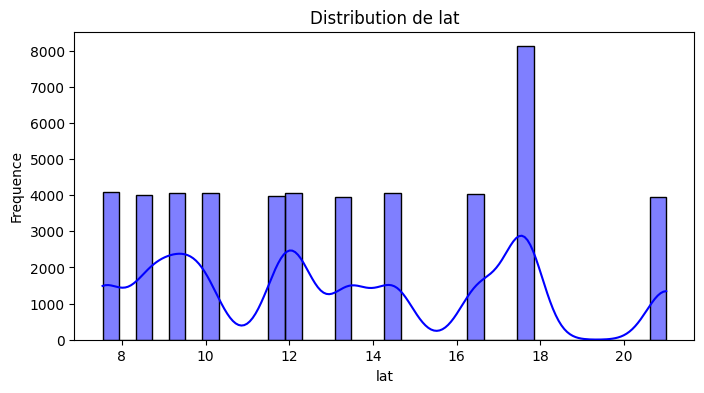

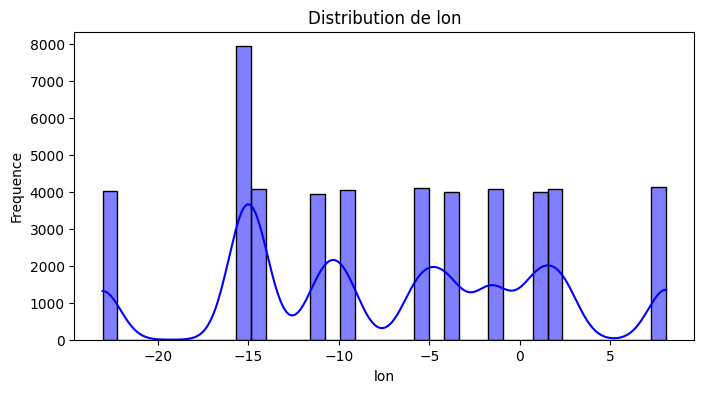

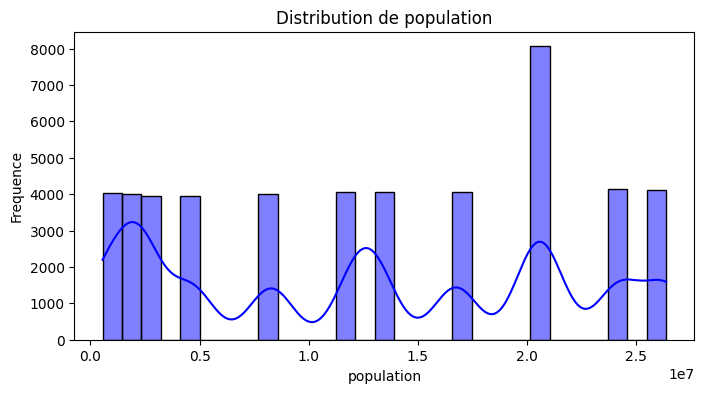

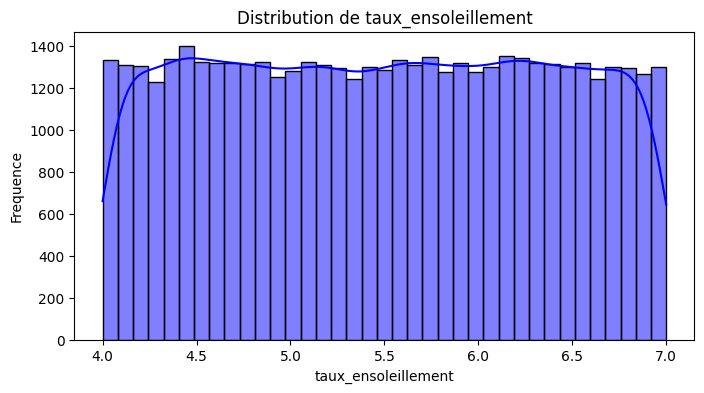

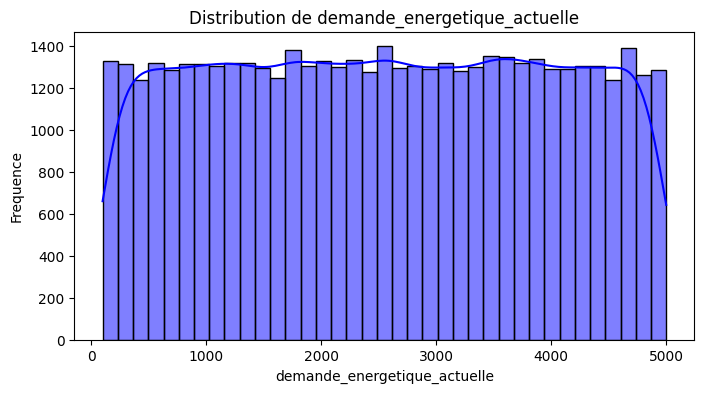

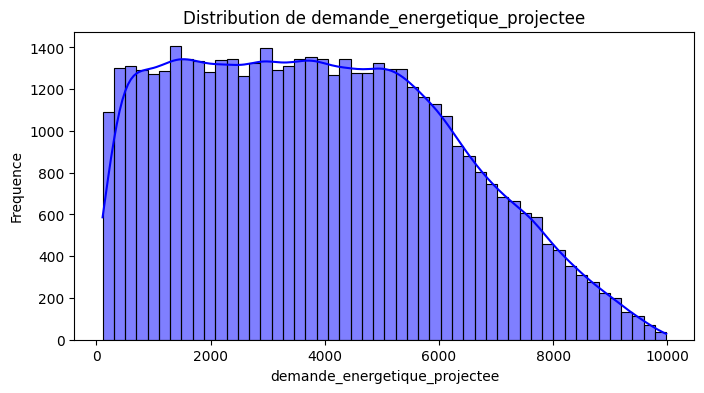

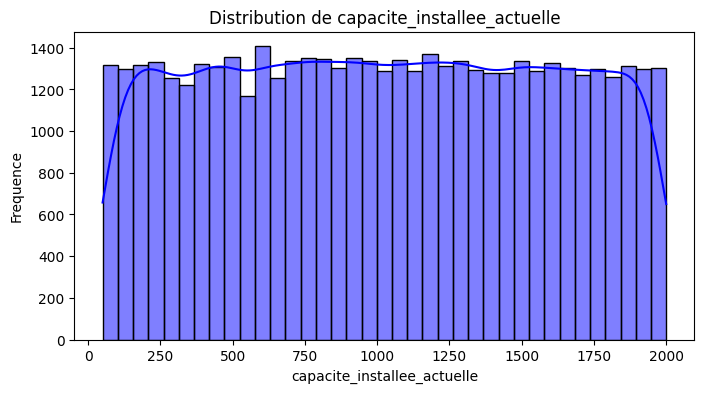

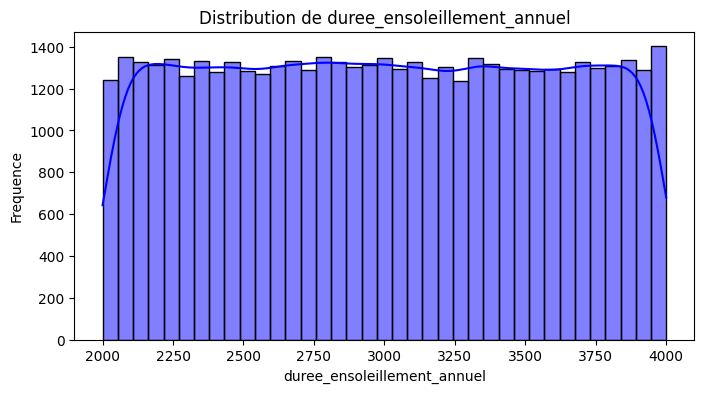

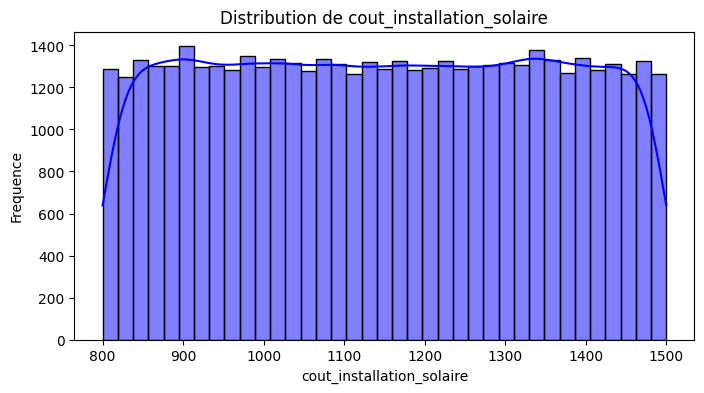

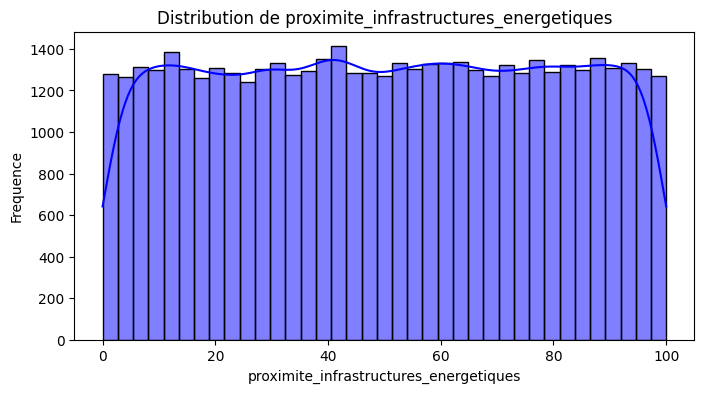

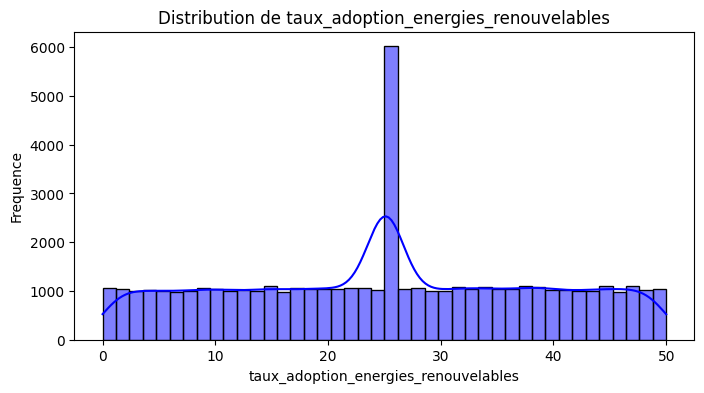

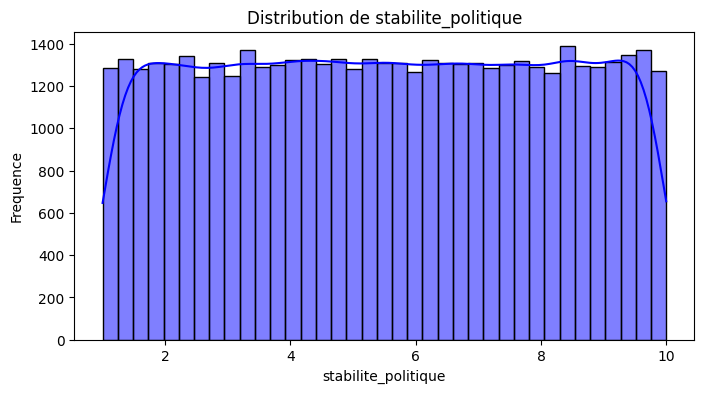

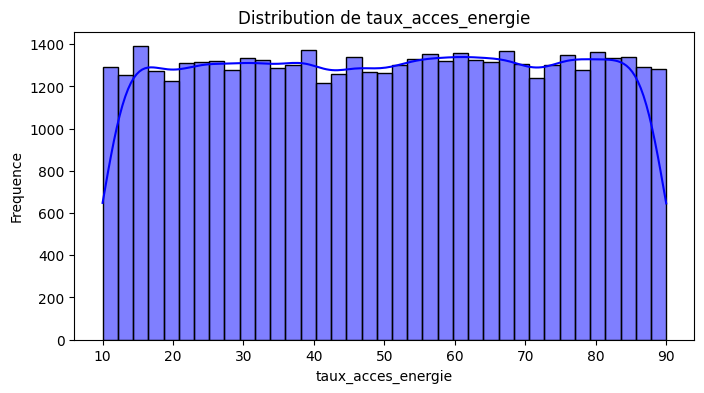

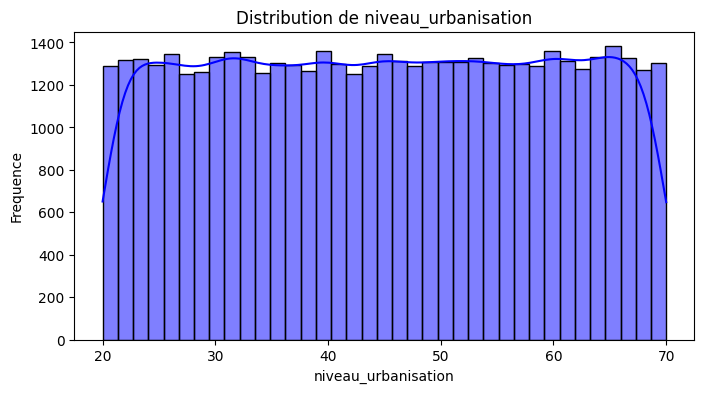

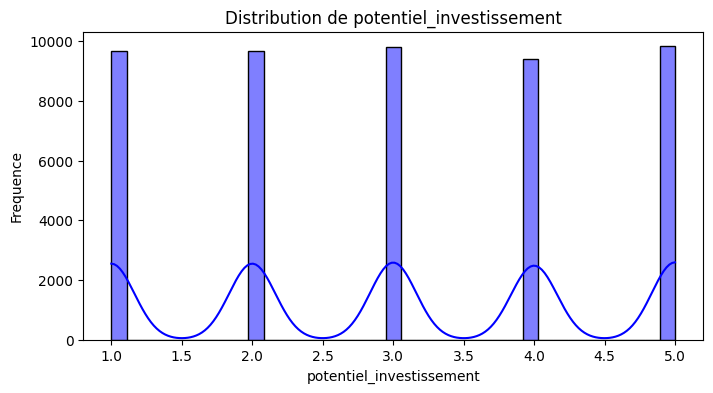

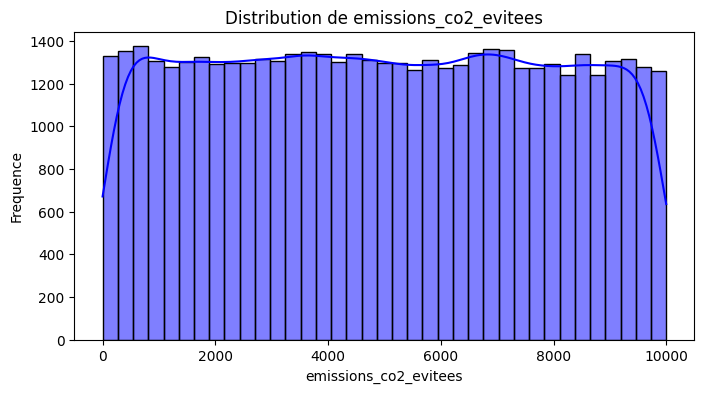

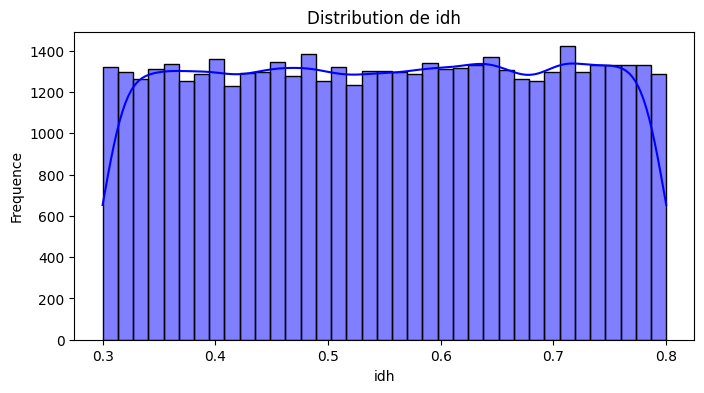

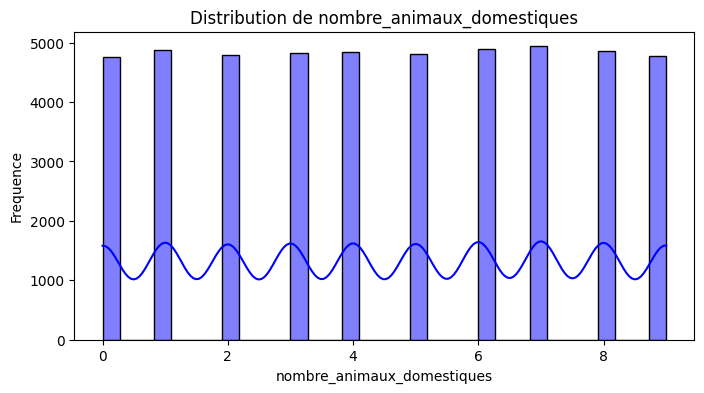

In [ ]:
# Histogrammes et des courbes de densite
for column in data_energy_uemoa_num.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_energy_uemoa_num[column].dropna(), kde=True, color='blue')
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequence')
    plt.show()

#### 5- Analyse Bivariee et Multivariee des variables

##### 5-1 Les relations entre la cible et les predicteurs : calcule de la correlation pour les variables numeriques, et utilisation des tests de dependance pour les categorielles.

###### 5-1-1 Correlation pour les variables numeriques

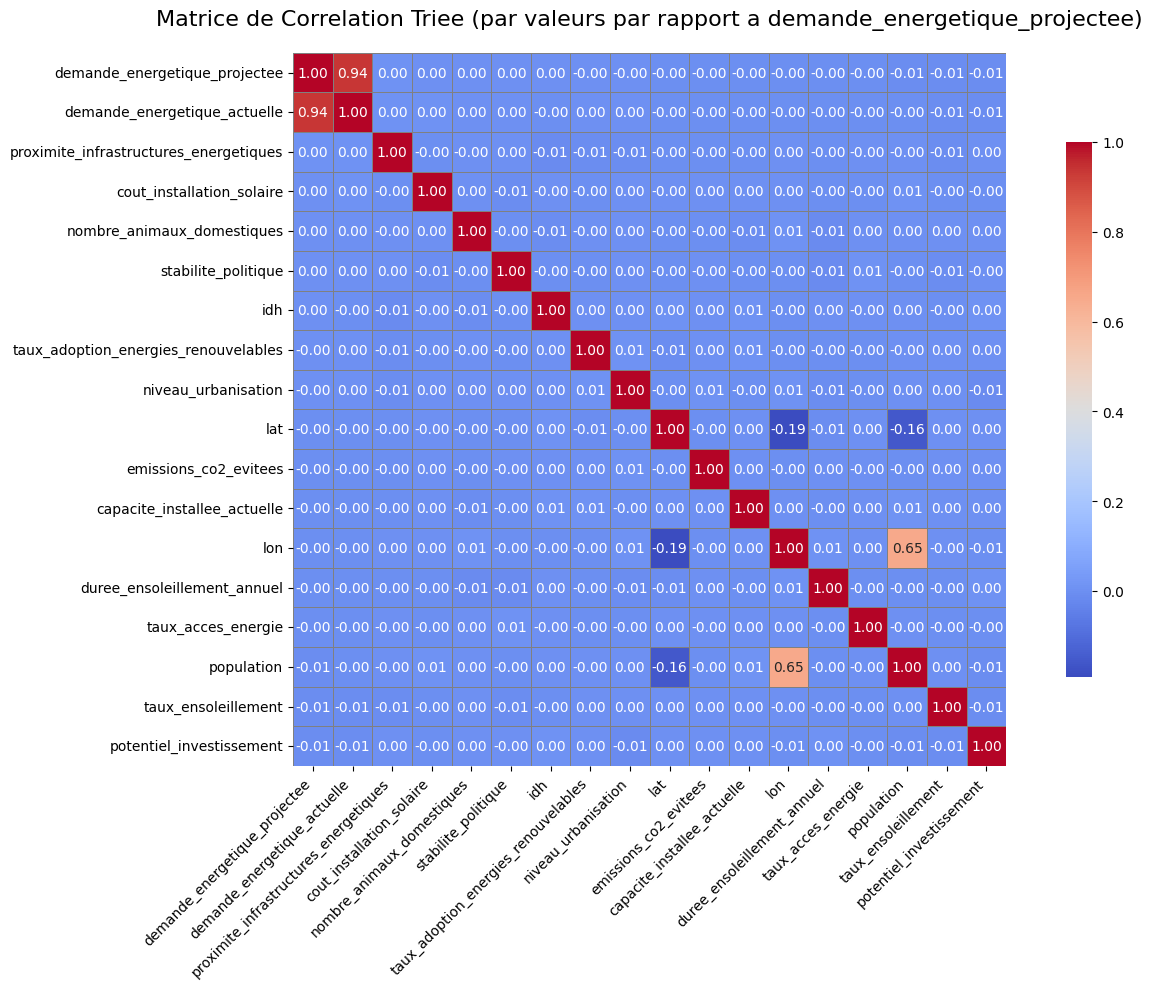

In [ ]:
# Calcul de la matrice de correlation
correlation_matrix = data_energy_uemoa_num.corr()

# Tri des variables en fonction des valeurs absolues de correlation avec 'demande_energetique_projectee'
sorted_columns = correlation_matrix['demande_energetique_projectee'].sort_values(ascending=False).index
sorted_correlation_matrix = correlation_matrix.loc[sorted_columns, sorted_columns]

# Visualisation de la matrice de correlation triee
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(
    sorted_correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .75},
    linewidths=0.5,
    linecolor='grey'
)

# Ameliorations esthetiques
heatmap.set_title('Matrice de Correlation Triee (par valeurs par rapport a demande_energetique_projectee)', fontsize=16, pad=20)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


###### 5-1-1 Utilisation des tests de dependance pour les categorielles.

In [ ]:
from scipy.stats import chi2_contingency

# Table de contingence entre 'habit_de_mariage' et 'demande_energetique_projectee'
table_contingence_habit = pd.crosstab(data_energy_uemoa['habit_de_mariage'], data_energy_uemoa['demande_energetique_projectee'])
chi2_habit, p_val_habit, dof_habit, expected_habit = chi2_contingency(table_contingence_habit)
print("Test Chi-carré pour 'habit_de_mariage' et 'demande_energetique_projectee'")
print("Chi-carré:", chi2_habit, "p-valeur:", p_val_habit)

# Table de contingence entre 'types_sols' et 'demande_energetique_projectee'
table_contingence_sols = pd.crosstab(data_energy_uemoa['types_sols'], data_energy_uemoa['demande_energetique_projectee'])
chi2_sols, p_val_sols, dof_sols, expected_sols = chi2_contingency(table_contingence_sols)
print("\nTest Chi-carré pour 'types_sols' et 'demande_energetique_projectee'")
print("Chi-carré:", chi2_sols, "p-valeur:", p_val_sols)



Test Chi-carré pour 'habit_de_mariage' et 'demande_energetique_projectee'
Chi-carré: 48364.0 p-valeur: 0.4978621206113464

Test Chi-carré pour 'types_sols' et 'demande_energetique_projectee'
Chi-carré: 96727.99999999999 p-valeur: 0.4975812713581608


##### 5-2 Detection des multicolinearites : VIF (Variance Inflation Factor) pour identifier des correlations elevees entre les predicteurs.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Ajout d'une constante pour le calcul du VIF
X = add_constant(data_energy_uemoa_num)

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Affichage des resultats
print(vif_data)


                                  Variable         VIF
0                                    const  178.715977
1                                      lat    1.039964
2                                      lon    1.772861
3                               population    1.750456
4                      taux_ensoleillement    1.000305
5             demande_energetique_actuelle    8.370934
6            demande_energetique_projectee    8.370423
7              capacite_installee_actuelle    1.000302
8              duree_ensoleillement_annuel    1.000568
9                cout_installation_solaire    1.000239
10  proximite_infrastructures_energetiques    1.000385
11    taux_adoption_energies_renouvelables    1.000294
12                     stabilite_politique    1.000452
13                      taux_acces_energie    1.000163
14                     niveau_urbanisation    1.000433
15                potentiel_investissement    1.000390
16                   emissions_co2_evitees    1.000118
17        

### 6- Normalisation et standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.compose import ColumnTransformer
import numpy as np


# Definition des variables numeriques et categorielles
numerical_features = [
    'lat', 'lon', 'population', 'taux_ensoleillement',
    'demande_energetique_actuelle', 'capacite_installee_actuelle',
    'duree_ensoleillement_annuel', 'cout_installation_solaire',
    'proximite_infrastructures_energetiques', 'taux_adoption_energies_renouvelables',
    'stabilite_politique', 'taux_acces_energie', 'niveau_urbanisation',
    'potentiel_investissement', 'emissions_co2_evitees', 'idh',
    'nombre_animaux_domestiques'
]

categorical_features = ['habit_de_mariage', 'types_sols', 'country']

# Variable cible a predire
target = 'demande_energetique_projectee'

# Verification des definitions
print("Variables numériques:", numerical_features)
print("Variables catégorielles:", categorical_features)
print("Variable cible à prédire:", target)


Variables numériques: ['lat', 'lon', 'population', 'taux_ensoleillement', 'demande_energetique_actuelle', 'capacite_installee_actuelle', 'duree_ensoleillement_annuel', 'cout_installation_solaire', 'proximite_infrastructures_energetiques', 'taux_adoption_energies_renouvelables', 'stabilite_politique', 'taux_acces_energie', 'niveau_urbanisation', 'potentiel_investissement', 'emissions_co2_evitees', 'idh', 'nombre_animaux_domestiques']
Variables catégorielles: ['habit_de_mariage', 'types_sols', 'country']
Variable cible à prédire: demande_energetique_projectee


In [ ]:
# Verifions que la colonne cible existe
if target not in data_energy_uemoa.columns:
    raise KeyError(f"La colonne '{target}' n'existe pas dans les donnees.")

# Pipeline pour les variables numeriques
numerical_transformer = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), numerical_features),  # Standardisation
        ('minmax_scaler', MinMaxScaler(), numerical_features)  # Normalisation
    ], remainder='passthrough'
)

# Pipeline pour les variables categorielles
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Application des transformations
data_energy_uemoa_transformed = pd.DataFrame(numerical_transformer.fit_transform(data_energy_uemoa[numerical_features]))
data_energy_uemoa_cat = pd.DataFrame(categorical_transformer.fit_transform(data_energy_uemoa[categorical_features]))

# Ajout de la variable cible
data_energy_uemoa_transformed[target] = data_energy_uemoa[target].values

# Verifions les colonnes transformees
data_energy_uemoa_transformed.columns

Index([                              0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,                              11,
                                    12,                              13,
                                    14,                              15,
                                    16,                              17,
                                    18,                              19,
                                    20,                              21,
                                    22,                              23,
                                    24,                              25,
                                    26,            

## PHASE 2 : CHOIX, TEST ET AJUSTEMENT DU MODELE

### 1 - Listing des modeles de Machine Learning pour comparaison via leur RMSE pour l'optimisation des performances sur nos donnees `data_energy_uemoa_transformed`

A. Modeles Lineaires

---



    1- Regression Lineaire
    2- Regression Ridge
    3- Regression Lasso
    4- Elastic Net

B. Modeles bases sur les Arbres de Decision

    5- Arbre de Regression
    6- Random Forest Regressor
    7- Gradient Boosting Regressor
    8- XGBoost Regressor

C. Modeles bases sur des Reseaux de Neurones

    9- Reseau de Neurones Dense (Feedforward Neural Network)

D. Modeles bases sur les k-Voisins les plus Proches (k-NN)

    10- K-Nearest Neighbors Regressor (KNN)**texte en gras**


E. Support Vector Regressor (SVR)

    11- SVR avec noyau lineaire ou radial



#### 2- Modeles Lineaires

#### 2-1 Regression lineaire

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Separation des variables explicatives et de la variable cible
X = data_energy_uemoa_transformed.drop(columns=[target])
y = data_energy_uemoa_transformed[target]

# Division des donnees en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2941176470588235, random_state=42)

# Initialisation et entrainement du modele de regression lineaire
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE sur les donnees de test:", rmse_linear)


RMSE sur les donnees de test: 790.471226976289


#### 2-2 Regression Ridge

In [ ]:
import joblib
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Définition des valeurs potentielles pour l'hyperparamètre alpha
param_grid = {'alpha': [0.1, 1, 10, 100, 200]}

# Initialisation de la régression Ridge avec recherche de la meilleure valeur d'alpha
ridge = Ridge()
ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Entraînement du modèle avec les données d'entraînement
ridge_cv.fit(X_train, y_train)

# Récupération du meilleur modèle Ridge
best_ridge_model = ridge_cv.best_estimator_

# Sauvegarde du modèle dans un fichier
joblib.dump(best_ridge_model, 'best_ridge_model.pkl')
print("Le modèle Ridge a été sauvegardé sous le nom 'best_ridge_model.pkl'.")

# Predictions sur l'ensemble de test
y_pred = best_ridge_model.predict(X_test)

# Calcul du RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE sur les données de test avec la régression Ridge:", rmse_ridge)
print("Meilleure valeur de l'hyperparamètre alpha:", ridge_cv.best_params_['alpha'])

# Exemple de rechargement du modèle pour effectuer des prédictions plus tard :
# Charger le modèle sauvegardé
loaded_model = joblib.load('best_ridge_model.pkl')

# Effectuer des prédictions avec le modèle chargé
y_pred_loaded = loaded_model.predict(X_test)
print("Prédictions effectuées avec le modèle chargé :", y_pred_loaded)



Le modèle Ridge a été sauvegardé sous le nom 'best_ridge_model.pkl'.
RMSE sur les données de test avec la régression Ridge: 790.480873089387
Meilleure valeur de l'hyperparamètre alpha: 1
Prédictions effectuées avec le modèle chargé : [3208.05706234 1018.22670415  822.79681344 ... 4429.89443992 4010.42065559
 2844.9536568 ]


#### 2-3 Regression Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Definition d'une grille de valeurs pour l'hyperparametre alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialisation du modele Lasso avec validation croisee pour trouver le meilleur alpha
lasso = Lasso()
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Entrainement du modele avec la recherche d'hyperparametres
grid_search.fit(X_train, y_train)

# Meilleur modele Lasso avec le meilleur alpha
best_lasso = grid_search.best_estimator_

# Predictions sur l'ensemble de test avec le modele Lasso ajuste
y_pred_lasso = best_lasso.predict(X_test)

# Calcul du RMSE
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("RMSE sur les donnees de test (Lasso):", rmse_lasso)
print("Meilleur alpha pour Lasso:", grid_search.best_params_['alpha'])


RMSE sur les donnees de test (Lasso): 790.3010647828055
Meilleur alpha pour Lasso: 10


#### 2-4 Regression ELASTIC NET

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Definition des hyperparametres pour Elastic Net
param_grid = {
    'alpha': [0.1, 1.0, 10.0],      # Intensite de la regularisation
    'l1_ratio': [0.1, 0.5, 0.9]     # Balance entre L1 et L2
}

# Initialisation du modele Elastic Net avec GridSearchCV
elastic_net = ElasticNet()
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Entrainement du modele avec recherche des meilleurs parametres
grid_search.fit(X_train, y_train)

# Affichage des meilleurs parametres trouves
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Predictions sur l'ensemble de test avec le meilleur modele
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcul du RMSE
rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE sur les donnees de test avec Elastic Net:", rmse_elastic_net)


Meilleurs hyperparamètres: {'alpha': 0.1, 'l1_ratio': 0.9}
RMSE sur les donnees de test avec Elastic Net: 790.6362276097947


### 3 - Modeles bases sur les arbres de Decision

#### 3-1 Arbre de Regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Séparation des variables explicatives et de la variable cible
X = data_energy_uemoa_transformed.drop(columns=[target])
y = data_energy_uemoa_transformed[target]

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2941176470588235, random_state=42)

# Initialisation et entraînement du modèle d'arbre de régression
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du RMSE
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE sur les données de test:", rmse_tree)


RMSE sur les données de test: 1122.3048740099407


#### 3-2 Random Forest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Initialisation et entraînement du modèle Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)  # Vous pouvez ajuster le nombre d'arbres avec n_estimators
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE sur les données de test (Random Forest):", rmse_rf)

RMSE sur les données de test (Random Forest): 801.258737383599


#### 3-3 Gradient Boosting Regressor


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


# Initialisation et entraînement du modèle GradientBoosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du RMSE
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE sur les données de test (Gradient Boosting):", rmse_gb)

RMSE sur les données de test (Gradient Boosting): 791.725192802408


#### 3-4 XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


# Initialisation et entraînement du modèle XGBoost Regressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE sur les données de test:", rmse_xgb)

RMSE sur les données de test: 827.1046503374733


### 3 - Modeles bases sur des Reseaux de Neurones

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error


# Standardisation des données (important pour les réseaux de neurones)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Création du modèle ANN
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Couche cachée avec 64 neurones
    Dense(32, activation='relu'),  # Deuxième couche cachée avec 32 neurones
    Dense(1, activation='linear')  # Couche de sortie pour un problème de régression
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du RMSE
rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE sur les données de test (ANN):", rmse_ann)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


854/854 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 16263162.0000 - mse: 16263162.0000 - val_loss: 935090.4375 - val_mse: 935090.4375
Epoch 2/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 902961.1875 - mse: 902961.1875 - val_loss: 825068.4375 - val_mse: 825068.4375
Epoch 3/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 837822.1875 - mse: 837822.1875 - val_loss: 800841.1875 - val_mse: 800841.1875
Epoch 4/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 820913.5625 - mse: 820913.5625 - val_loss: 782698.1875 - val_mse: 782698.1875
Epoch 5/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 789717.8750 - mse: 789717.8750 - val_loss: 768337.5000 - val_mse: 768337.5000
Epoch 6/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 784863.8125 - mse: 784863.8125 - val_loss: 762785.5625 - val_mse: 762785.5625
Epoch 7/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 765190.1250 - mse: 765190.1250 - val_loss: 750982.1250 - val_mse: 750982.1250
Epoch 8/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 2

### 4 - Modeles bases sur les k-Voisins les plus Proches (k-NN)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialisation et entraînement du modèle K-Nearest Neighbors (choix de k = 5 par défaut)
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model_knn.predict(X_test)

# Calcul du RMSE
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE sur les données de test (KNN):", rmse_knn)

RMSE sur les données de test (KNN): 1187.7963678527833


### 5 Modele Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialisation du modèle SVR
model = SVR(kernel='rbf')  # Kernel peut être changé selon le besoin (ex: 'linear', 'poly', 'sigmoid')

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du RMSE
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE sur les données de test avec SVR:", rmse_svr)

RMSE sur les données de test avec SVR: 1859.292525817941


### 6- Comparaison de tous les RMSE et choix definitif d'un modele

Meilleur RMSE est obtenu avec le modele: Lasso Regression
Valeur du meilleur RMSE: 790.3010647828055


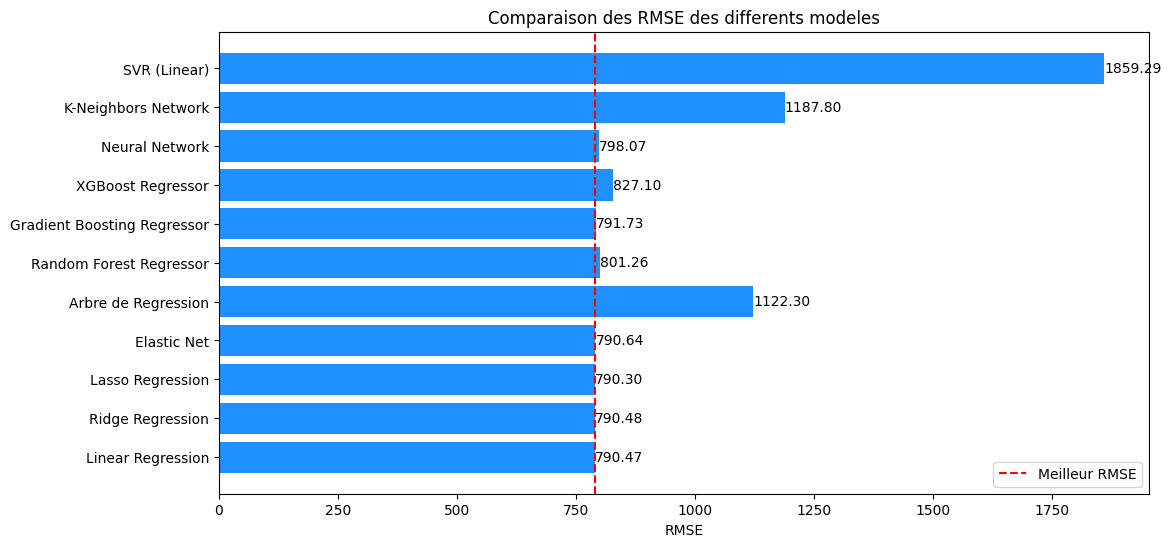

In [ ]:
# Liste des RMSE deja calcules
rmse_values = {
    'Linear Regression': rmse_linear,
    'Ridge Regression': rmse_ridge,
    'Lasso Regression': rmse_lasso,
    'Elastic Net': rmse_elastic_net,
    'Arbre de Regression' :rmse_tree,
    'Random Forest Regressor': rmse_rf,
    'Gradient Boosting Regressor': rmse_gb,
    'XGBoost Regressor': rmse_xgb,
    'Neural Network': rmse_ann,
    'K-Neighbors Network': rmse_knn,
    'SVR (Linear)': rmse_svr
}

# Identification du meilleur RMSE
best_model = min(rmse_values, key=rmse_values.get)
best_rmse = rmse_values[best_model]

# Affichage des RMSE
print("Meilleur RMSE est obtenu avec le modele:", best_model)
print("Valeur du meilleur RMSE:", best_rmse)

# Creation du graphique
plt.figure(figsize=(12, 6))
bars = plt.barh(list(rmse_values.keys()), list(rmse_values.values()), color='dodgerblue')
plt.xlabel('RMSE')
plt.title('Comparaison des RMSE des differents modeles')
plt.axvline(best_rmse, color='red', linestyle='--', label='Meilleur RMSE')
plt.legend()

# Ajout des valeurs de RMSE sur chaque barre
for bar, rmse in zip(bars, rmse_values.values()):
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f'{rmse:.2f}',
             va='center', color='black')

plt.show()


## PHASE 3 : STATISTIQUES DESCRIPTIVES ET ANALYSES PRELIMINAIRES

### 3.1 Analyse des tendances pour établir des recommandations économiques, environnementales, sociales, financières et géographiques pour la région
  


#### 3.1.1 LE BURKINA-FASO, MALI, TOGO, BENIN, NIGER, SENEGAL, COTE D'IVOIRE, GUINEE-CONAKRY, GUINEE-BISSAU, MAURITANIE, CAP-VERT ET GAMBIE

##### 1.	Tendances pour établir les recommandations économiques

###### 1.1 Taux d'adoption des énergies renouvelables et la capacité installée actuelle

###### 1.1 Taux d'adoption des énergies renouvelables et la capacité installée actuelle ()

Analyse en cours pour le pays : Benin


<ipython-input-35-43da7ca65723>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.dropna(subset=[
<ipython-input-35-43da7ca65723>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['taux_adoption_energies_renouvelables'] = y


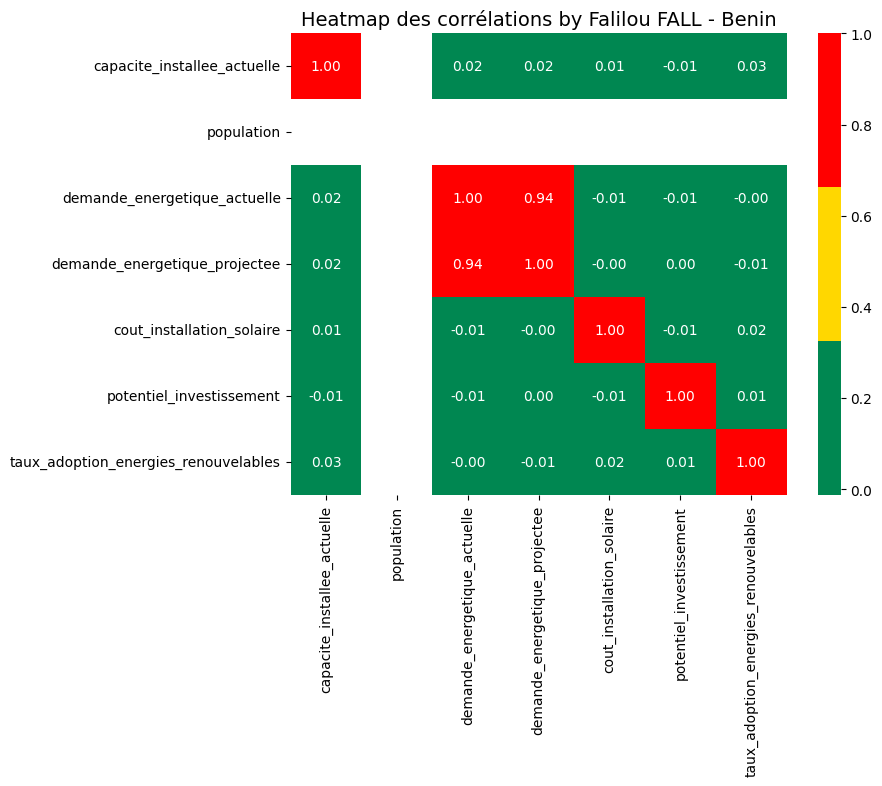

               Model      MSE Mean       MSE Std        R2 Mean        R2 Std
3  Linear Regression  7.711150e-25  1.362478e-24       1.000000  0.000000e+00
1              Ridge  5.111545e-10  2.427192e-11       1.000000  5.208267e-14
0      Random Forest  2.225930e-04  2.584268e-05       0.999999  1.568833e-07
2              Lasso  2.693441e-04  2.089104e-04       0.999999  1.102404e-06
5         ElasticNet  2.696047e-04  2.089982e-04       0.999999  1.102855e-06
4  Gradient Boosting  2.722440e-03  1.518914e-04       0.999985  6.102298e-07
6     Neural Network  3.134665e+07  6.257535e+07 -162504.207532  3.243682e+05


<ipython-input-35-43da7ca65723>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-43da7ca65723>:97: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


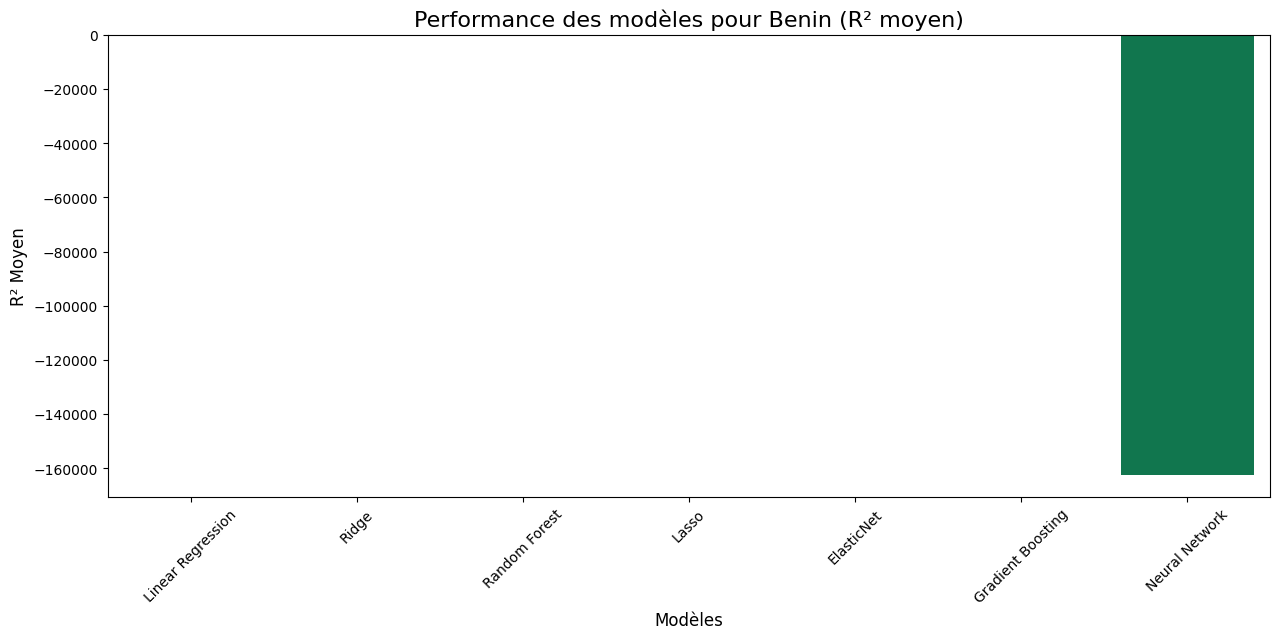

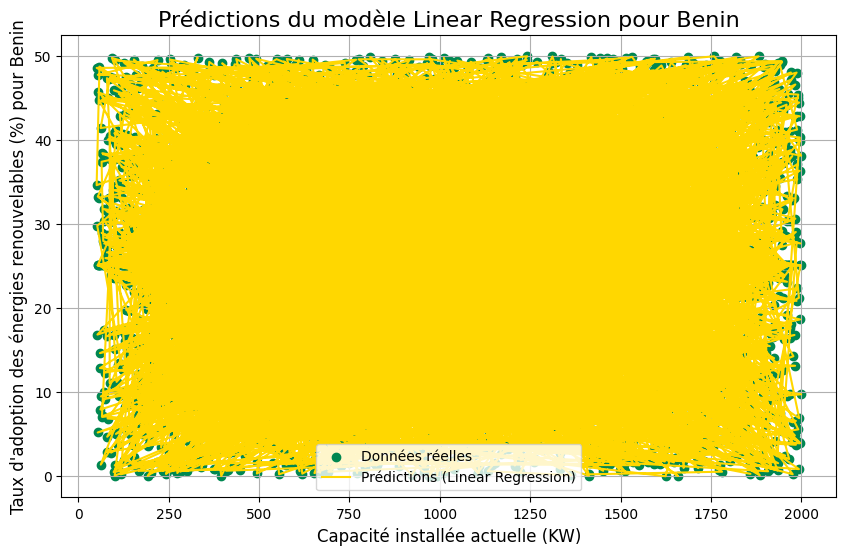

Analyse en cours pour le pays : Burkina Faso


<ipython-input-35-43da7ca65723>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.dropna(subset=[
<ipython-input-35-43da7ca65723>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['taux_adoption_energies_renouvelables'] = y


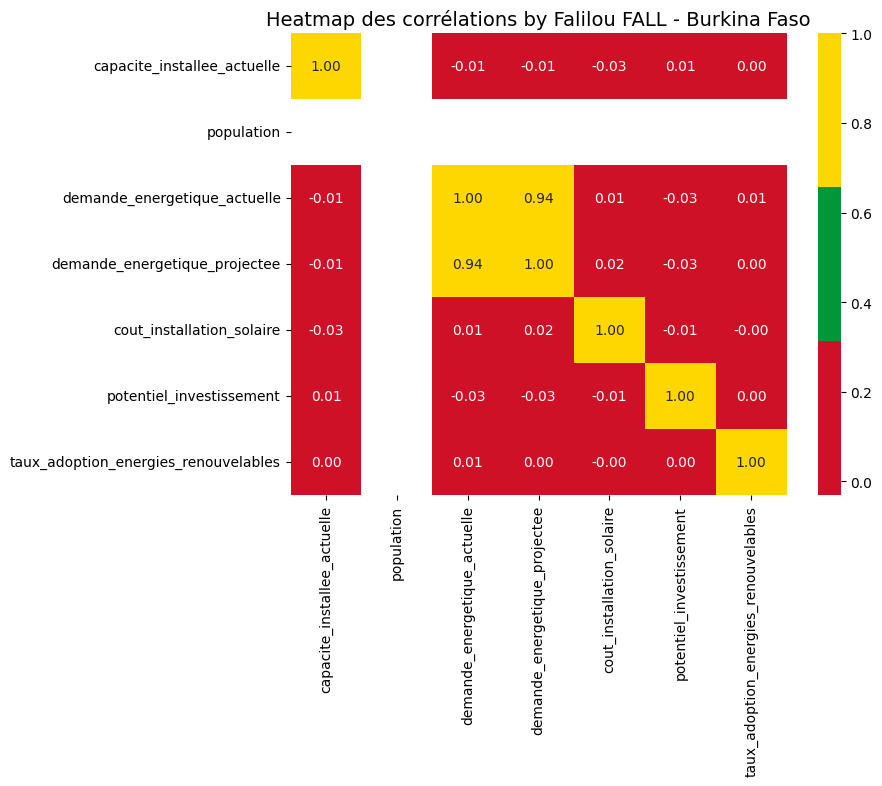

               Model      MSE Mean       MSE Std     R2 Mean        R2 Std
3  Linear Regression  9.041037e-27  8.742811e-27    1.000000  0.000000e+00
1              Ridge  4.984327e-10  1.753477e-11    1.000000  4.362171e-14
0      Random Forest  2.204042e-04  1.591475e-05    0.999999  1.021908e-07
2              Lasso  8.506679e-04  7.777058e-04    0.999996  3.996955e-06
5         ElasticNet  8.508055e-04  7.777236e-04    0.999996  3.997061e-06
4  Gradient Boosting  2.725473e-03  1.552743e-04    0.999986  9.652469e-07
6     Neural Network  1.751077e+05  1.032401e+05 -918.860228  5.424627e+02


<ipython-input-35-43da7ca65723>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-43da7ca65723>:97: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


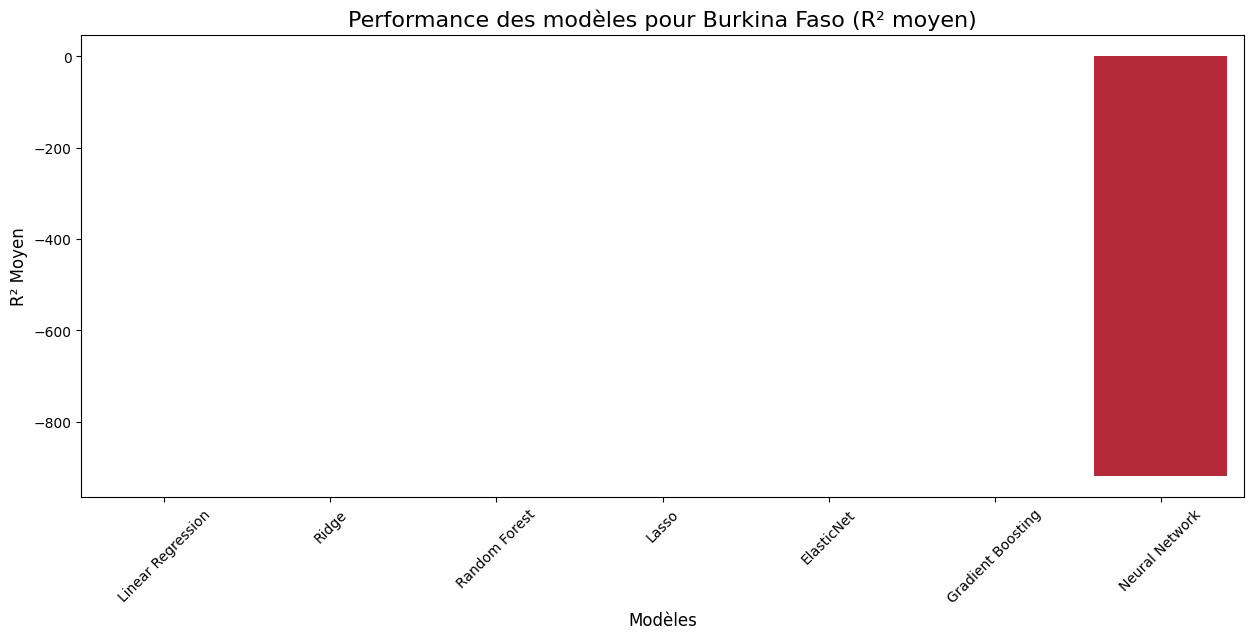

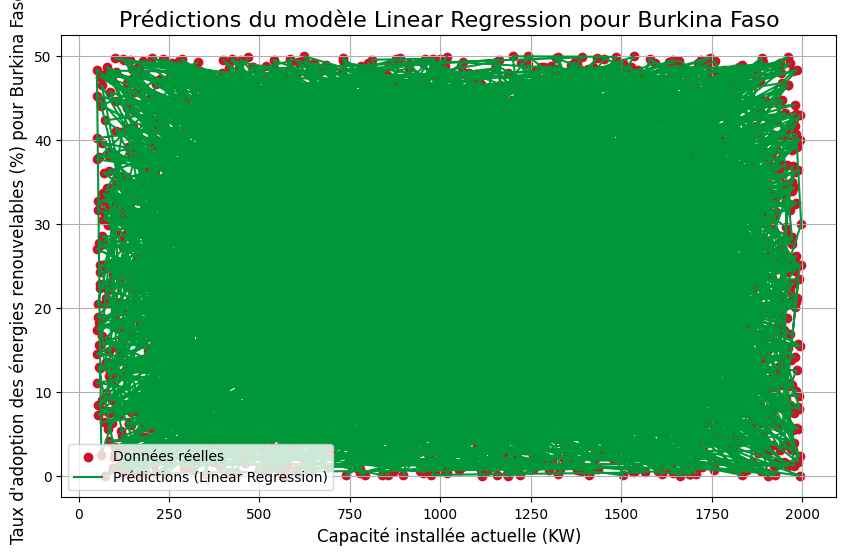

Analyse en cours pour le pays : Côte d'Ivoire


<ipython-input-35-43da7ca65723>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.dropna(subset=[
<ipython-input-35-43da7ca65723>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['taux_adoption_energies_renouvelables'] = y


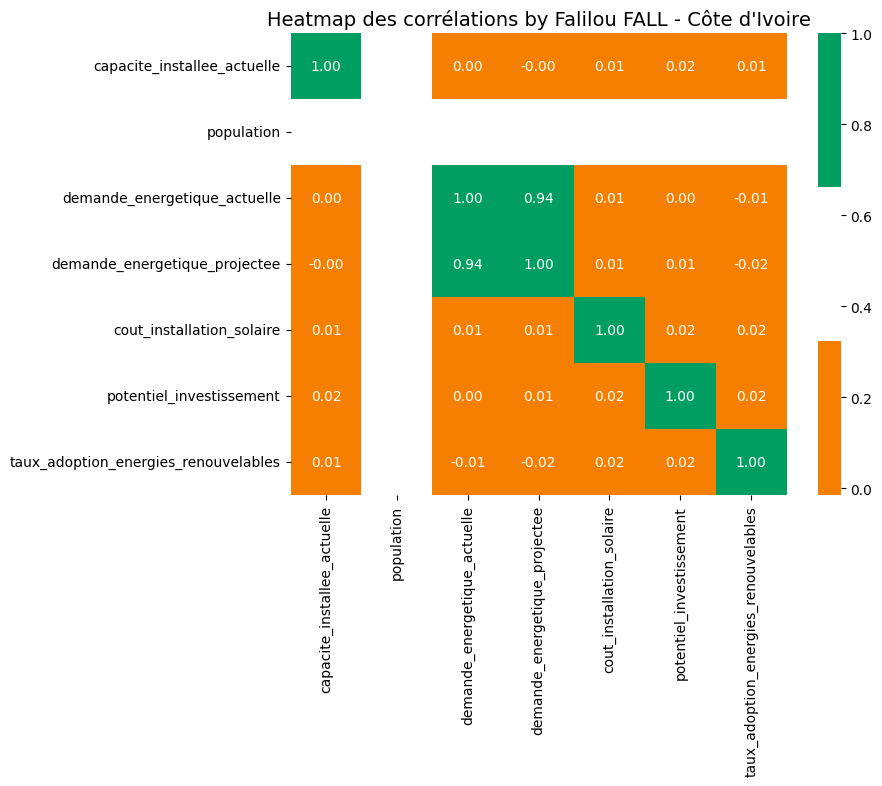

               Model      MSE Mean       MSE Std      R2 Mean        R2 Std
3  Linear Regression  5.936501e-25  9.519736e-25     1.000000  0.000000e+00
1              Ridge  5.023159e-10  8.675884e-12     1.000000  2.271083e-14
0      Random Forest  2.149937e-04  2.734137e-05     0.999999  1.367440e-07
2              Lasso  7.279539e-04  3.964764e-04     0.999996  2.149499e-06
5         ElasticNet  7.282705e-04  3.965628e-04     0.999996  2.149980e-06
4  Gradient Boosting  2.606599e-03  1.229733e-04     0.999986  7.586738e-07
6     Neural Network  2.281172e+05  1.657041e+05 -1229.337105  9.030700e+02


<ipython-input-35-43da7ca65723>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-43da7ca65723>:97: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


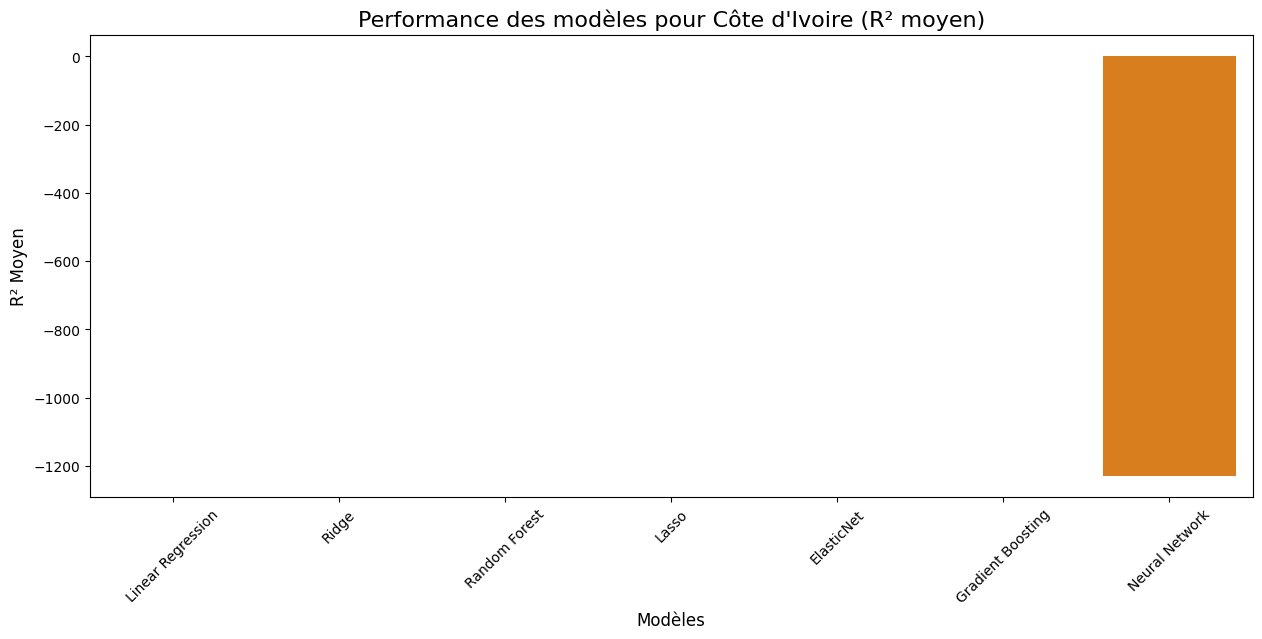

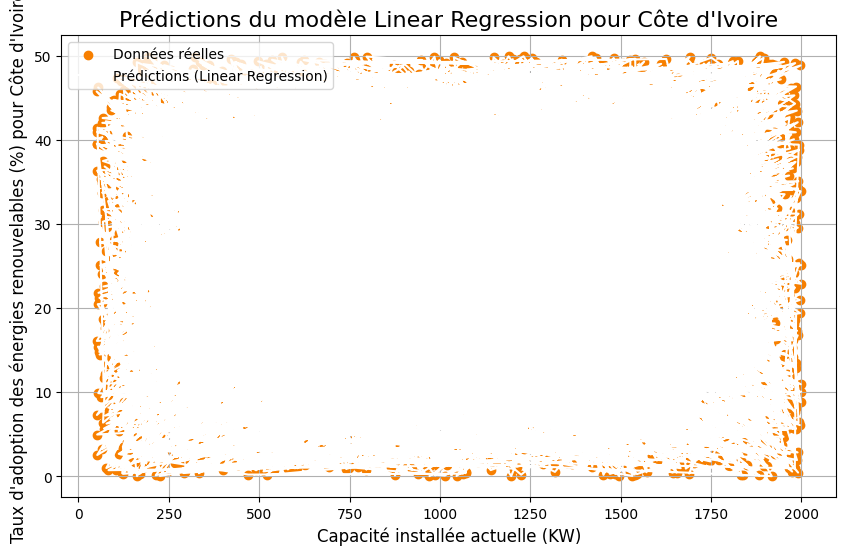

Analyse en cours pour le pays : Guinea-Bissau


<ipython-input-35-43da7ca65723>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.dropna(subset=[
<ipython-input-35-43da7ca65723>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['taux_adoption_energies_renouvelables'] = y


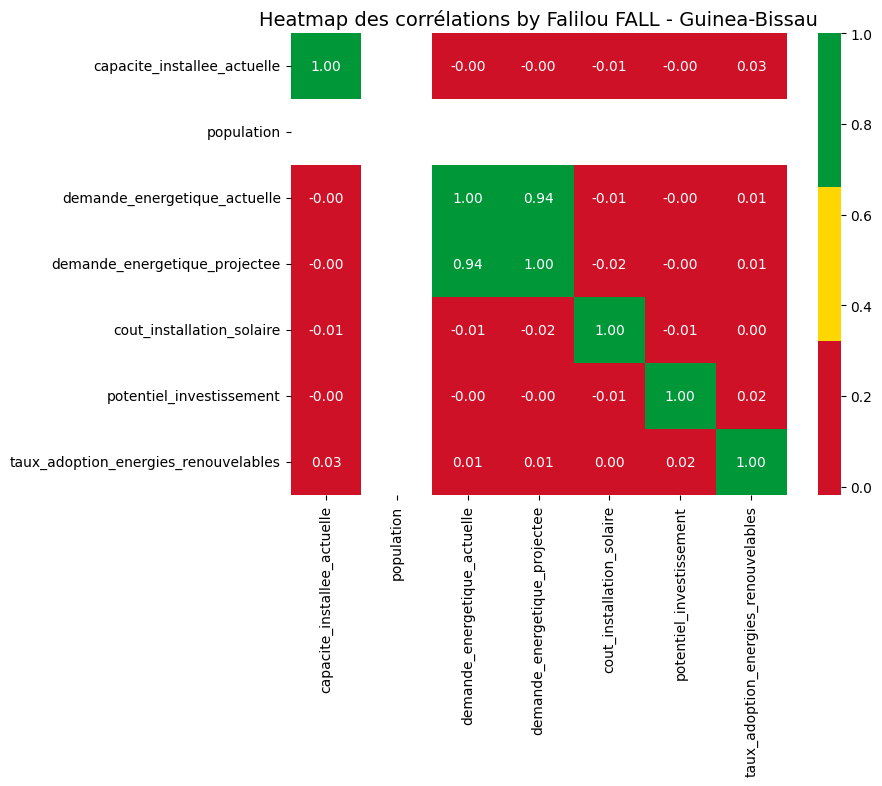

               Model      MSE Mean       MSE Std   R2 Mean        R2 Std
3  Linear Regression  5.719294e-25  8.770051e-25  1.000000  0.000000e+00
1              Ridge  5.241979e-10  2.063606e-11  1.000000  3.655949e-14
2              Lasso  1.236451e-04  5.205660e-05  0.999999  2.779924e-07
5         ElasticNet  1.237207e-04  5.207467e-05  0.999999  2.780716e-07
0      Random Forest  2.335618e-04  2.602210e-05  0.999999  1.084863e-07
4  Gradient Boosting  2.651158e-03  2.347175e-04  0.999986  1.095978e-06
6     Neural Network  1.580022e+03  2.778658e+02 -7.379605  1.308360e+00


<ipython-input-35-43da7ca65723>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-43da7ca65723>:97: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


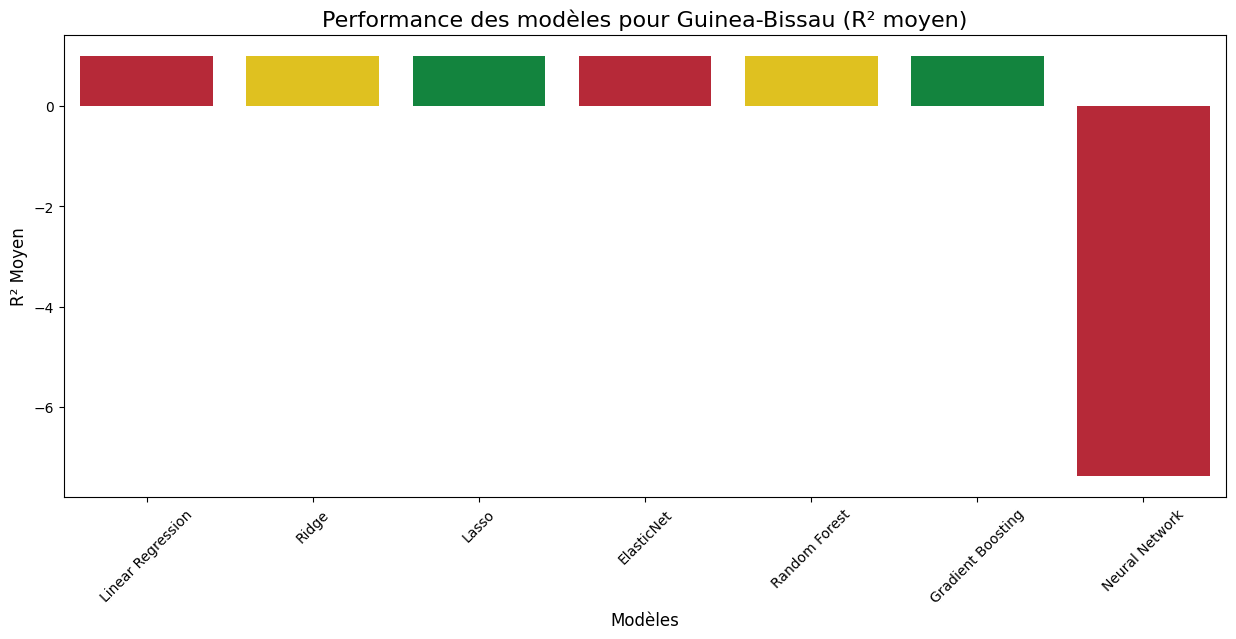

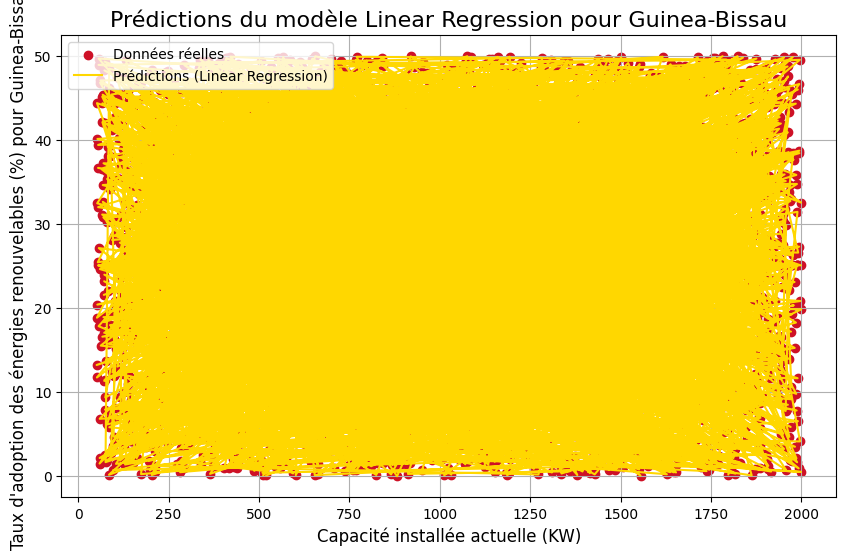

Analyse en cours pour le pays : Mali


<ipython-input-35-43da7ca65723>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.dropna(subset=[
<ipython-input-35-43da7ca65723>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['taux_adoption_energies_renouvelables'] = y


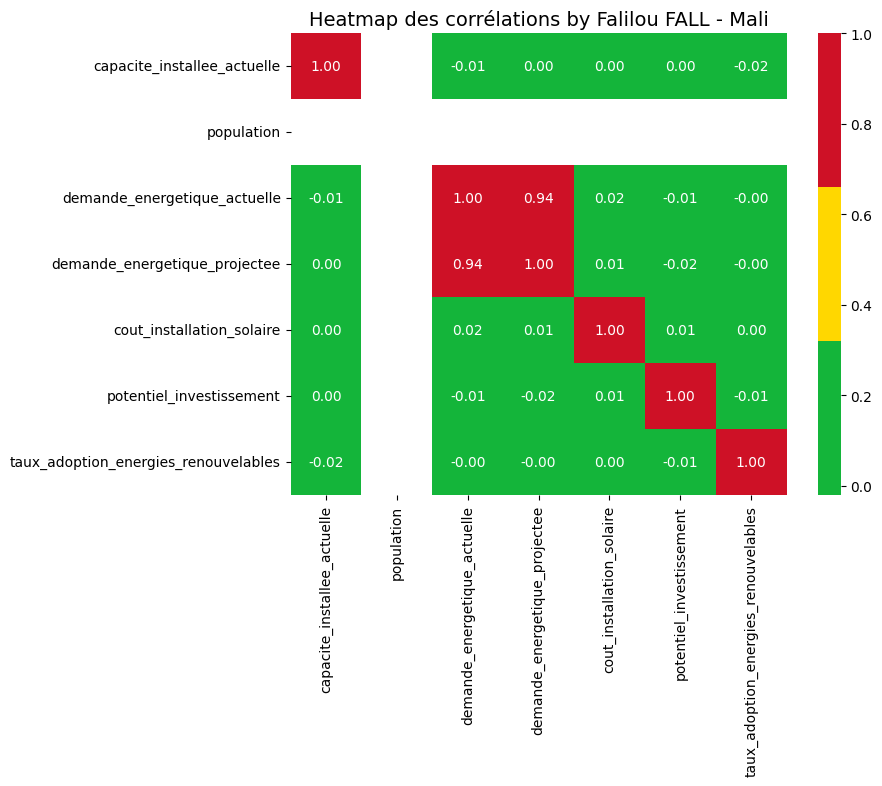

               Model      MSE Mean       MSE Std      R2 Mean        R2 Std
3  Linear Regression  2.754403e-25  3.374057e-25     1.000000  0.000000e+00
1              Ridge  5.328326e-10  2.274847e-11     1.000000  4.291761e-14
2              Lasso  1.459359e-04  1.681179e-04     0.999999  8.670221e-07
5         ElasticNet  1.459851e-04  1.681705e-04     0.999999  8.672956e-07
0      Random Forest  2.267783e-04  1.674835e-05     0.999999  9.751739e-08
4  Gradient Boosting  2.657471e-03  1.541135e-04     0.999986  8.583240e-07
6     Neural Network  4.905226e+05  6.212045e+05 -2578.285286  3.190100e+03


<ipython-input-35-43da7ca65723>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-43da7ca65723>:97: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


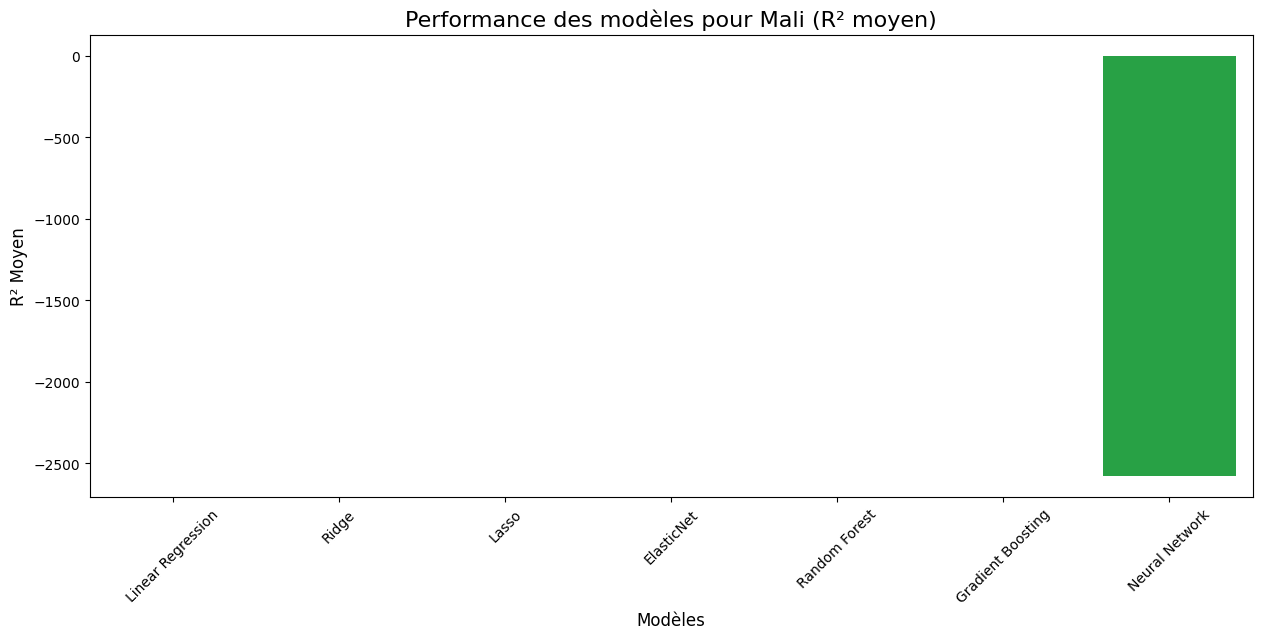

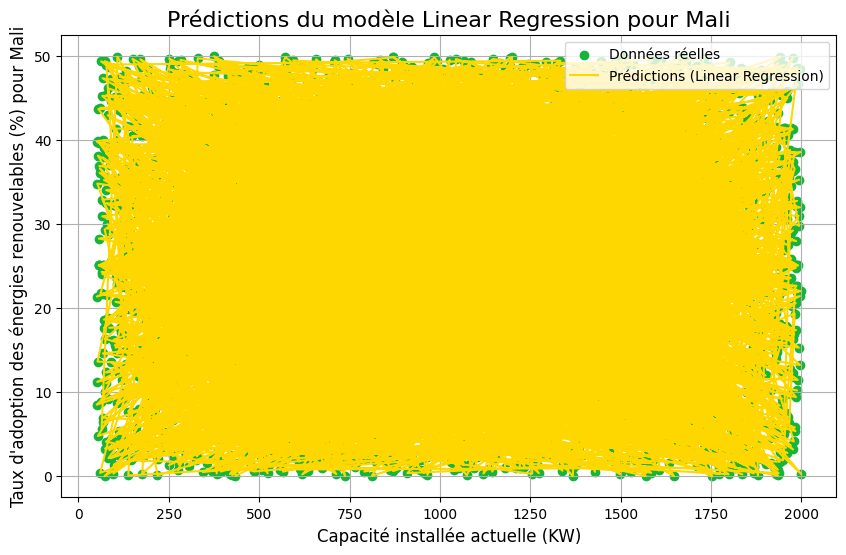

Analyse en cours pour le pays : Niger


<ipython-input-35-43da7ca65723>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.dropna(subset=[
<ipython-input-35-43da7ca65723>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['taux_adoption_energies_renouvelables'] = y


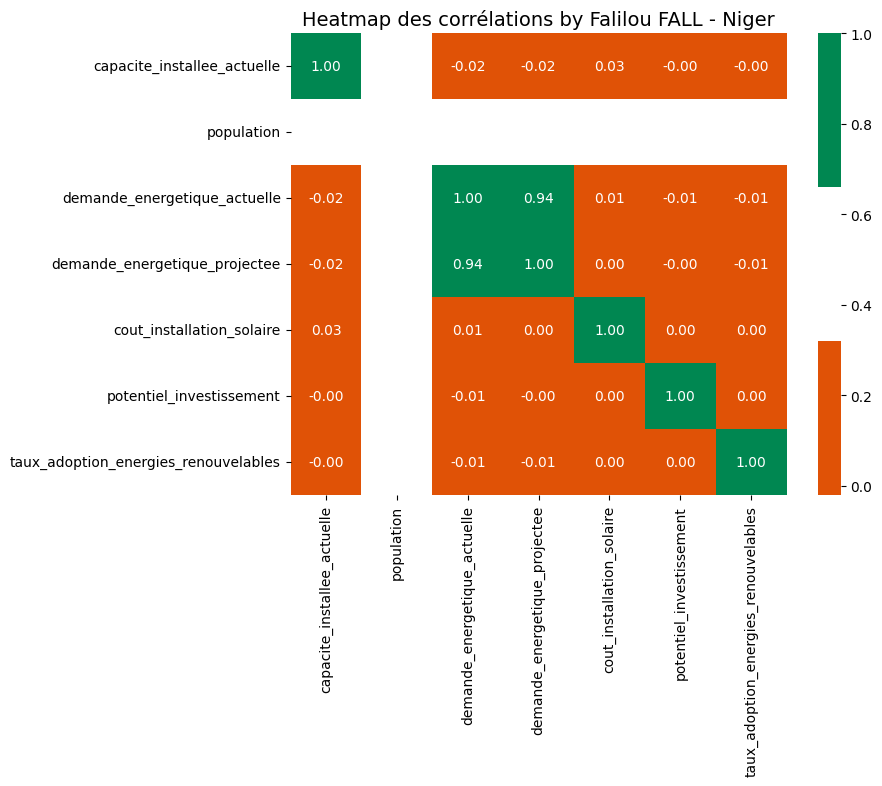

               Model      MSE Mean       MSE Std     R2 Mean        R2 Std
3  Linear Regression  3.444449e-27  4.871522e-27    1.000000  0.000000e+00
1              Ridge  4.974494e-10  1.387568e-11    1.000000  2.348194e-14
2              Lasso  9.968191e-05  1.119342e-04    0.999999  5.928053e-07
5         ElasticNet  9.972131e-05  1.119231e-04    0.999999  5.927448e-07
0      Random Forest  2.096110e-04  1.080245e-05    0.999999  7.061428e-08
4  Gradient Boosting  2.710455e-03  1.992552e-04    0.999985  1.245015e-06
6     Neural Network  1.472222e+05  6.501979e+04 -795.997657  3.576740e+02


<ipython-input-35-43da7ca65723>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-43da7ca65723>:97: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


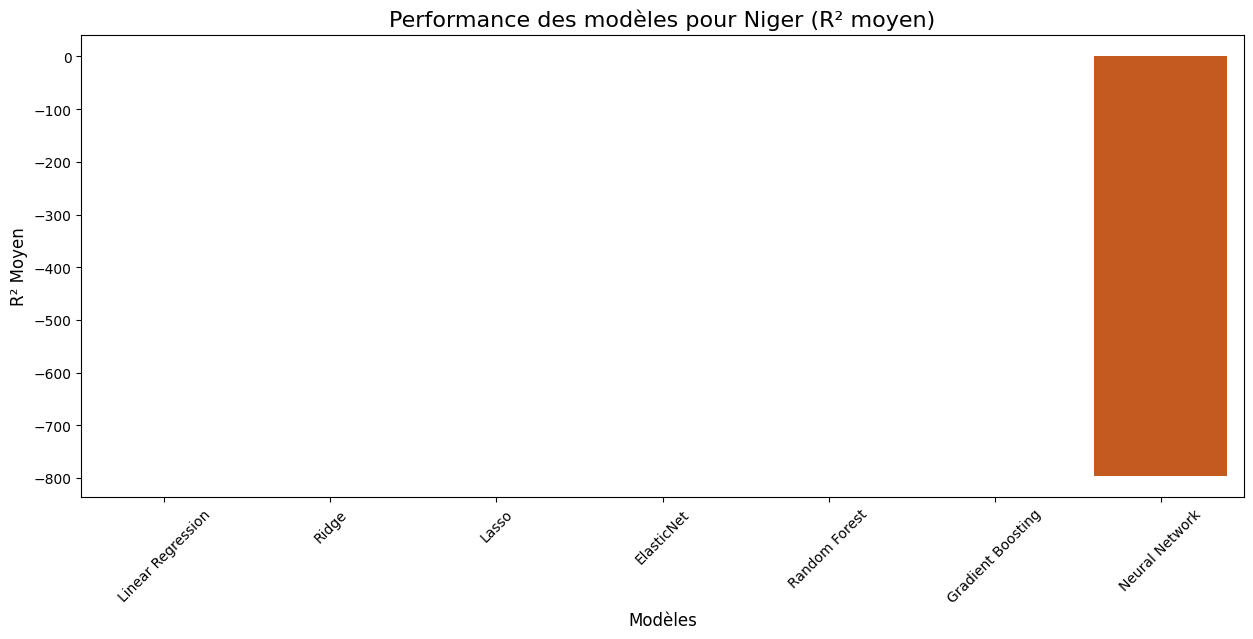

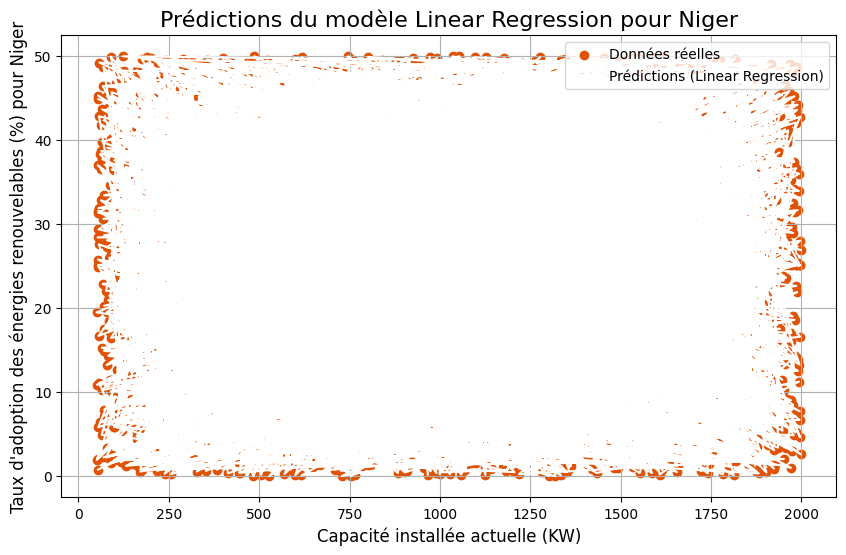

Analyse en cours pour le pays : Senegal


<ipython-input-35-43da7ca65723>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.dropna(subset=[
<ipython-input-35-43da7ca65723>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['taux_adoption_energies_renouvelables'] = y


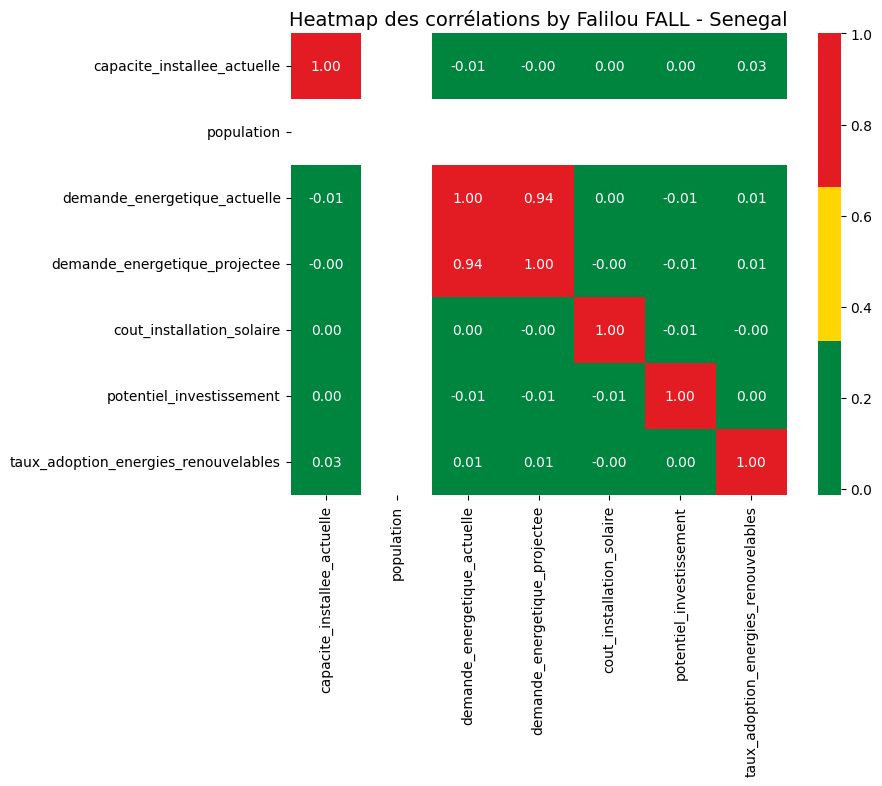

               Model      MSE Mean       MSE Std      R2 Mean        R2 Std
3  Linear Regression  2.142558e-25  1.146696e-25     1.000000  0.000000e+00
1              Ridge  5.181381e-10  2.587138e-11     1.000000  4.873305e-14
2              Lasso  7.854885e-05  1.050063e-04     1.000000  5.664533e-07
5         ElasticNet  7.857679e-05  1.050130e-04     1.000000  5.664894e-07
0      Random Forest  2.285609e-04  1.992159e-05     0.999999  7.296128e-08
4  Gradient Boosting  2.721314e-03  1.165719e-04     0.999985  4.307818e-07
6     Neural Network  2.450413e+05  2.597959e+05 -1343.456352  1.437929e+03


<ipython-input-35-43da7ca65723>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-43da7ca65723>:97: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


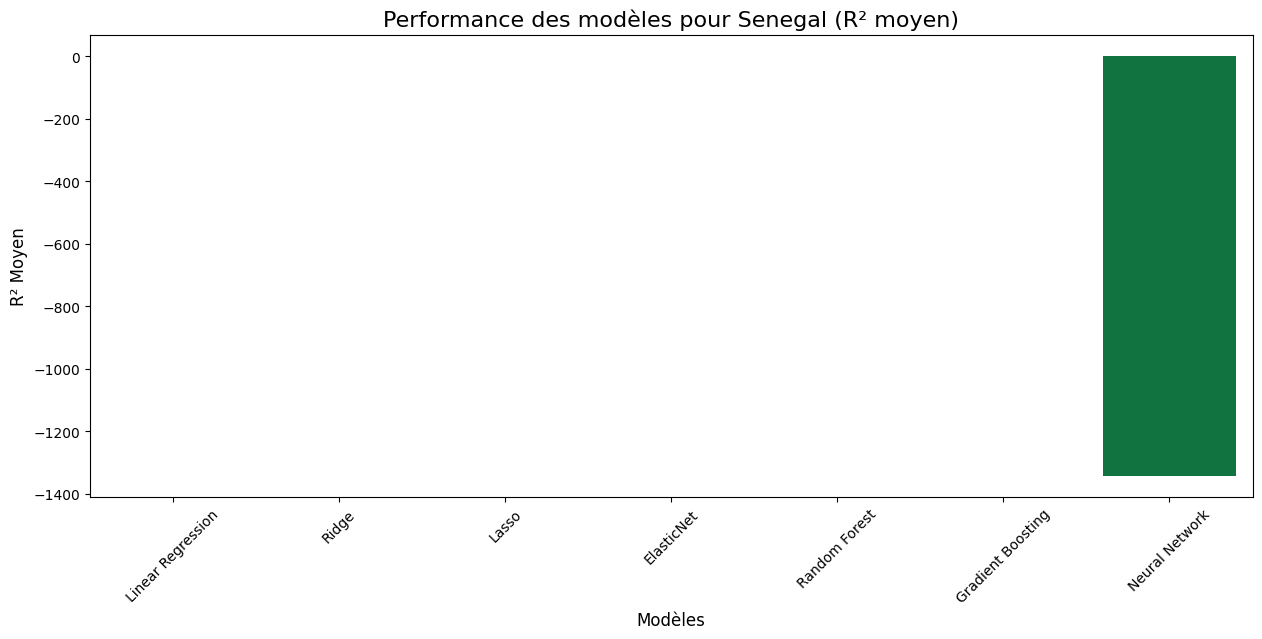

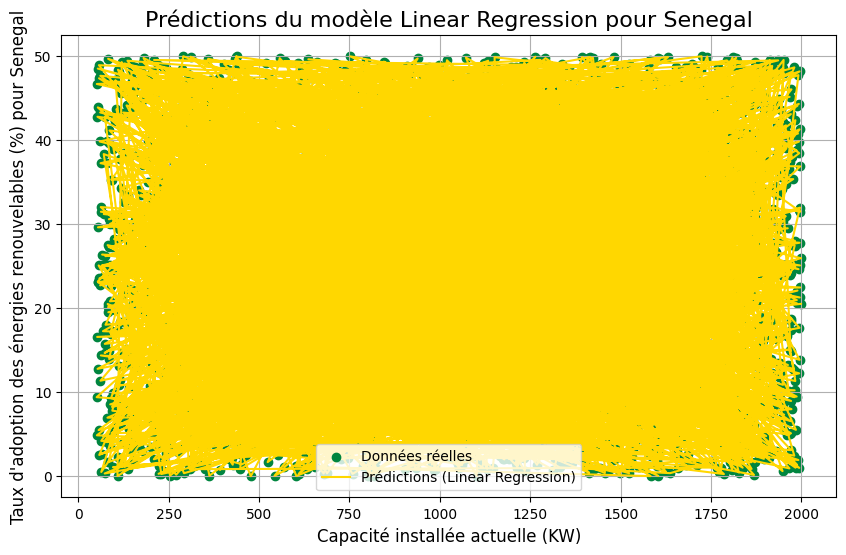

Analyse en cours pour le pays : Togo


<ipython-input-35-43da7ca65723>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.dropna(subset=[
<ipython-input-35-43da7ca65723>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['taux_adoption_energies_renouvelables'] = y


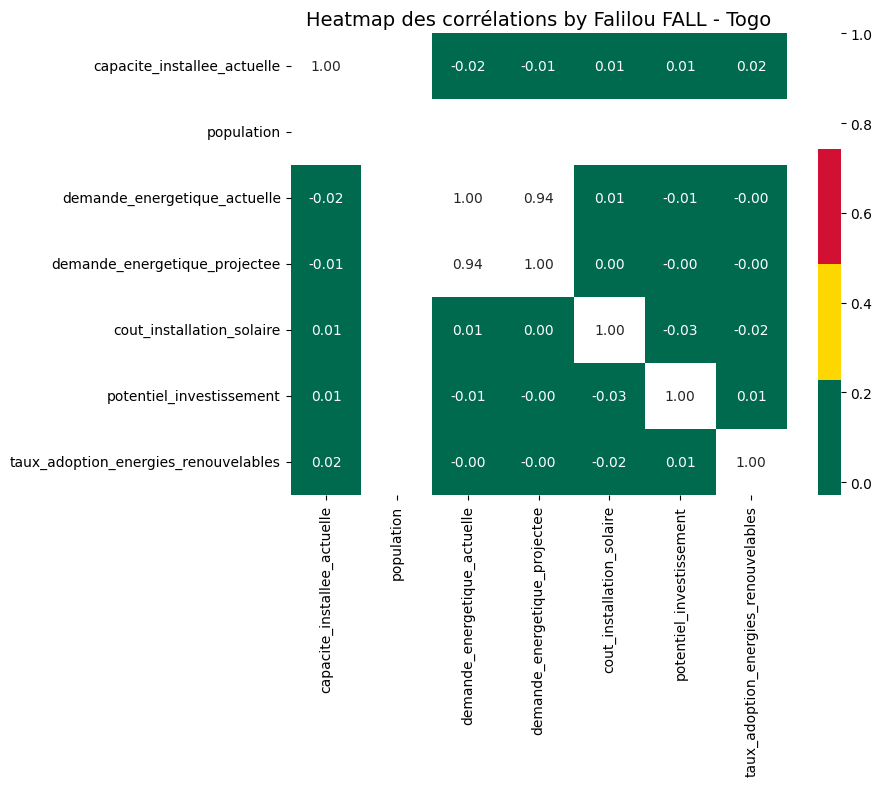

               Model      MSE Mean       MSE Std     R2 Mean        R2 Std
3  Linear Regression  2.474683e-25  2.483529e-25    1.000000  0.000000e+00
1              Ridge  5.220573e-10  3.108206e-11    1.000000  5.785609e-14
2              Lasso  1.732049e-04  1.449162e-04    0.999999  7.799412e-07
5         ElasticNet  1.732544e-04  1.448887e-04    0.999999  7.798383e-07
0      Random Forest  2.345515e-04  2.653778e-05    0.999999  1.547187e-07
4  Gradient Boosting  2.501740e-03  3.985295e-05    0.999987  7.063674e-07
6     Neural Network  9.508488e+04  5.187817e+04 -513.331441  2.924568e+02


<ipython-input-35-43da7ca65723>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-43da7ca65723>:97: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


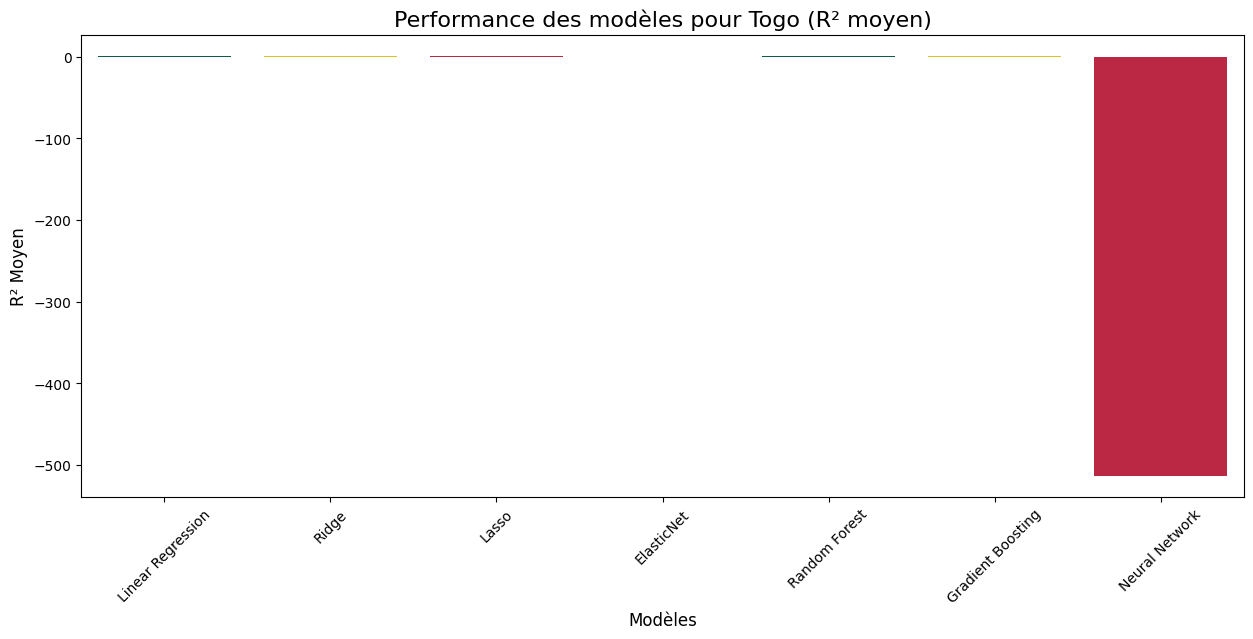

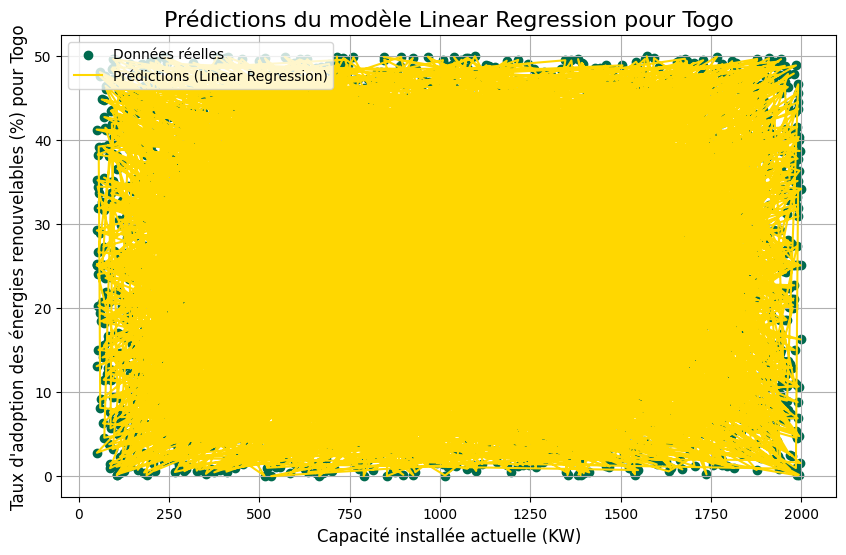

Analyse en cours pour le pays : Guinea


<ipython-input-35-43da7ca65723>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.dropna(subset=[
<ipython-input-35-43da7ca65723>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['taux_adoption_energies_renouvelables'] = y


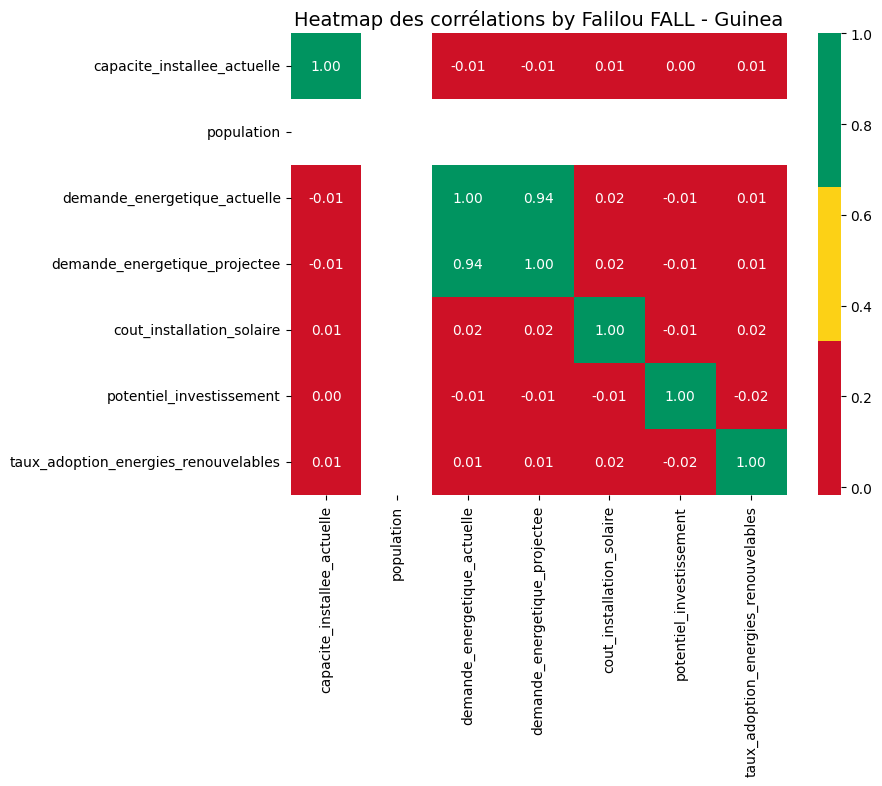

               Model      MSE Mean       MSE Std     R2 Mean        R2 Std
3  Linear Regression  6.613962e-25  1.243263e-24    1.000000  0.000000e+00
1              Ridge  5.170113e-10  3.143082e-11    1.000000  5.072118e-14
2              Lasso  1.478218e-04  7.988781e-05    0.999999  4.665229e-07
5         ElasticNet  1.479729e-04  7.998084e-05    0.999999  4.670732e-07
0      Random Forest  2.354822e-04  1.877781e-05    0.999999  1.183366e-07
4  Gradient Boosting  2.701220e-03  8.300462e-05    0.999985  5.838515e-07
6     Neural Network  9.893742e+04  2.827682e+04 -536.957751  1.599983e+02


<ipython-input-35-43da7ca65723>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-43da7ca65723>:97: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


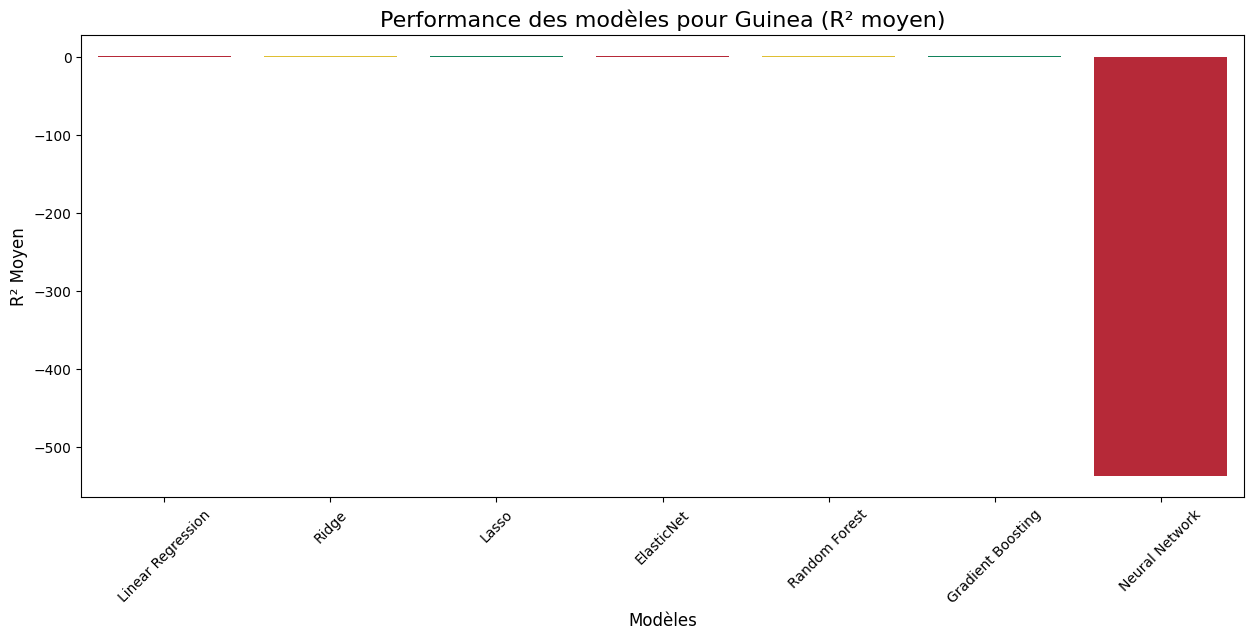

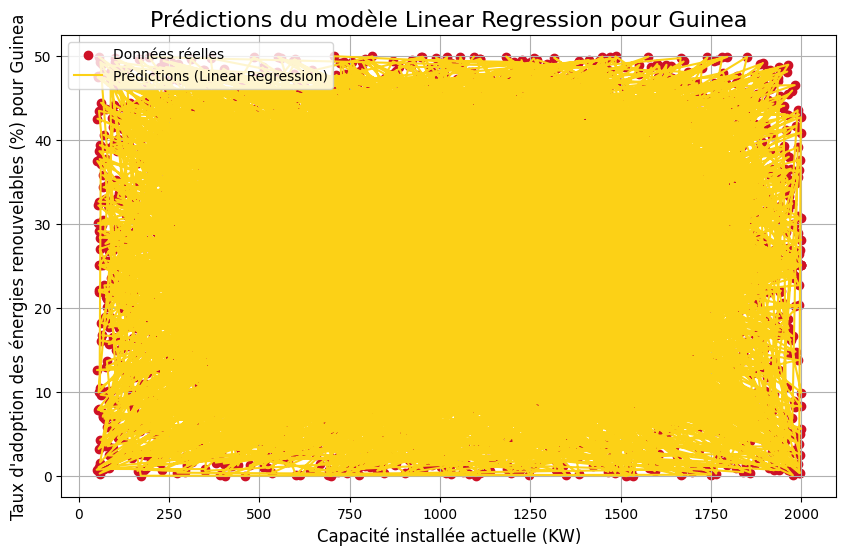

Analyse en cours pour le pays : Mauritania


<ipython-input-35-43da7ca65723>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.dropna(subset=[
<ipython-input-35-43da7ca65723>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['taux_adoption_energies_renouvelables'] = y


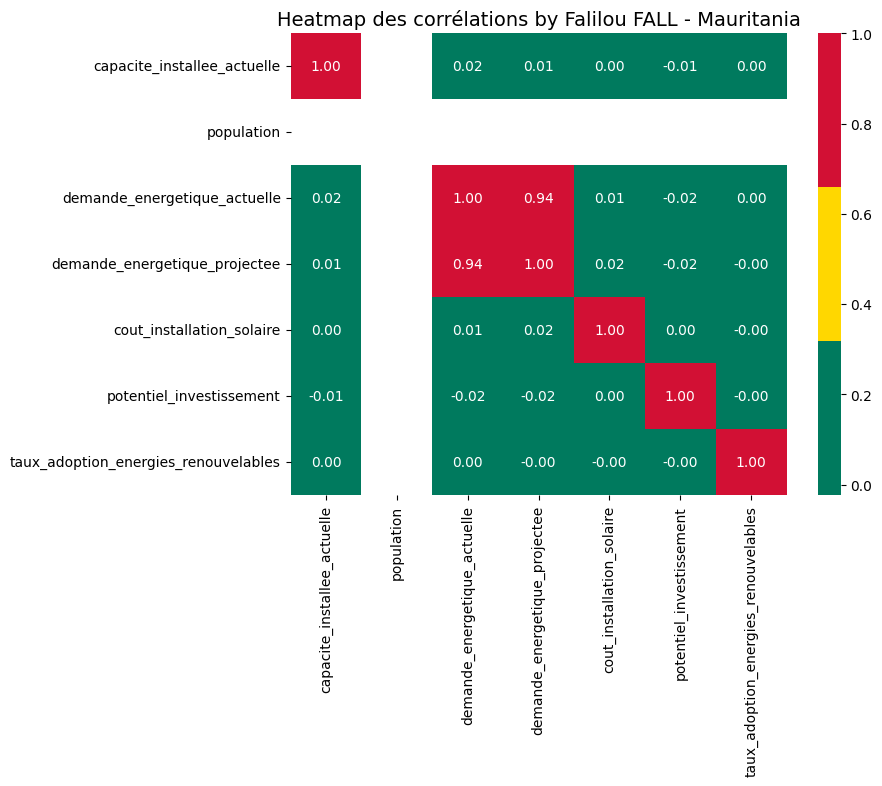

               Model      MSE Mean       MSE Std    R2 Mean        R2 Std
3  Linear Regression  2.793597e-25  5.062461e-25   1.000000  0.000000e+00
1              Ridge  5.352439e-10  1.942487e-11   1.000000  3.034144e-14
0      Random Forest  2.373524e-04  1.283310e-05   0.999999  5.175961e-08
2              Lasso  3.409552e-04  2.285274e-04   0.999998  1.200365e-06
5         ElasticNet  3.410714e-04  2.286212e-04   0.999998  1.200870e-06
4  Gradient Boosting  2.686839e-03  1.092708e-04   0.999986  8.824311e-07
6     Neural Network  9.930316e+03  1.002029e+04 -52.063592  5.356955e+01


<ipython-input-35-43da7ca65723>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-43da7ca65723>:97: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


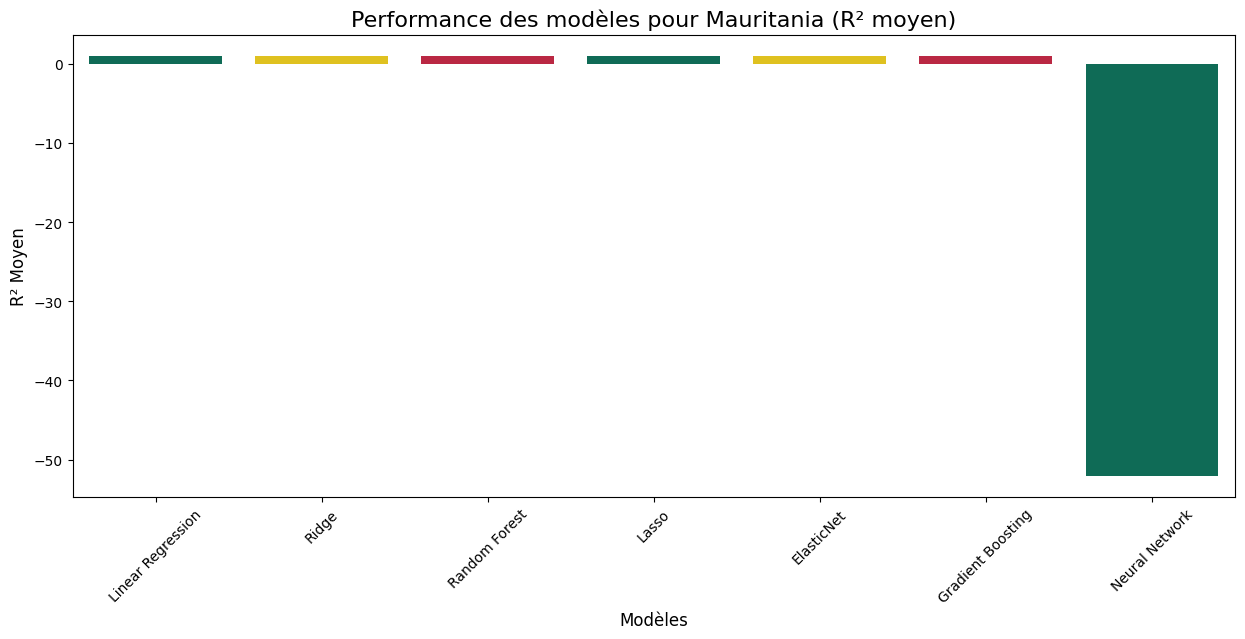

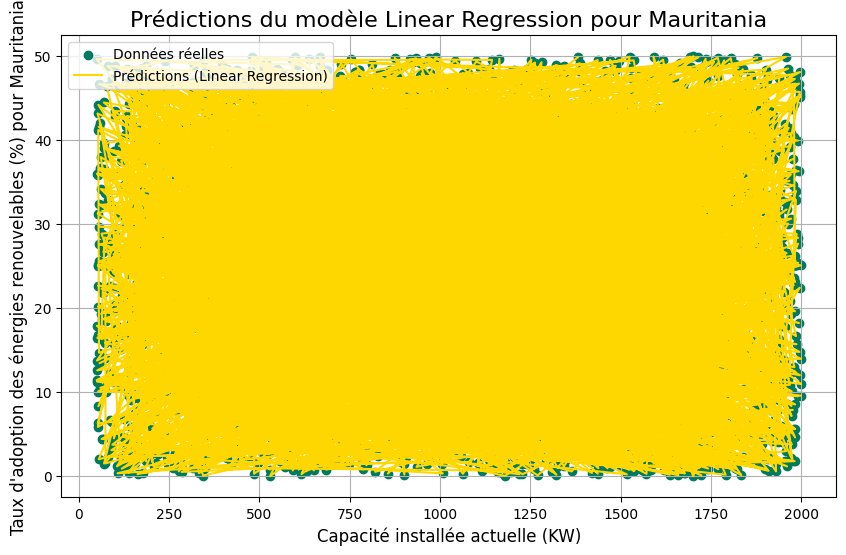

Analyse en cours pour le pays : Gambia


<ipython-input-35-43da7ca65723>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.dropna(subset=[
<ipython-input-35-43da7ca65723>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['taux_adoption_energies_renouvelables'] = y


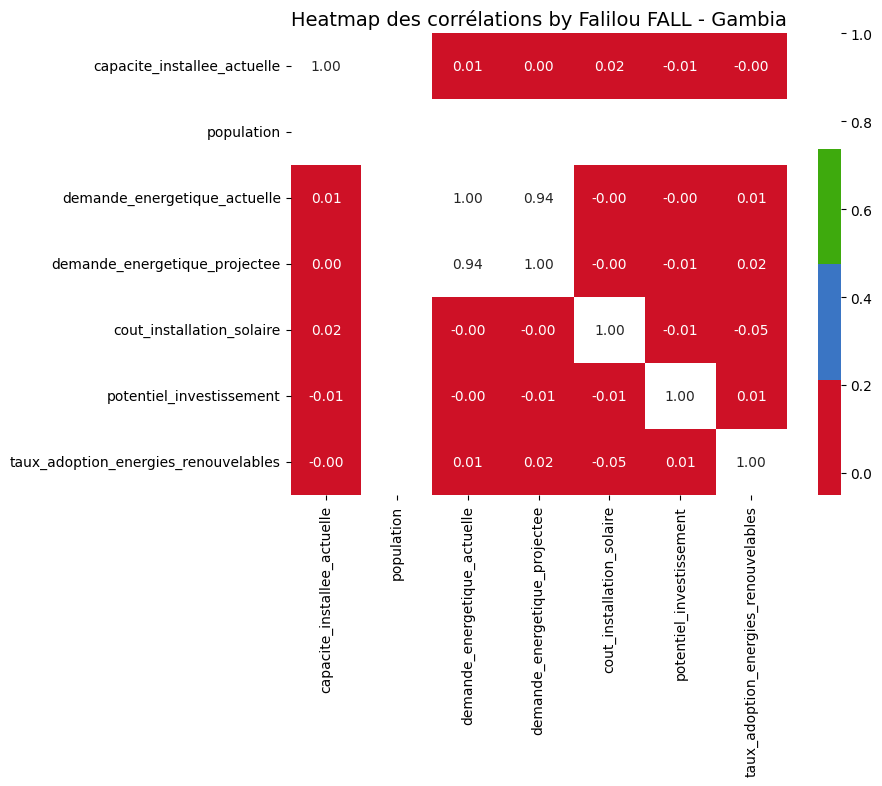

               Model      MSE Mean       MSE Std   R2 Mean        R2 Std
3  Linear Regression  1.288578e-26  8.204896e-27  1.000000  0.000000e+00
1              Ridge  5.483615e-10  2.410352e-11  1.000000  4.780549e-14
0      Random Forest  2.402635e-04  7.666737e-06  0.999999  6.956281e-08
2              Lasso  5.646420e-04  3.337190e-04  0.999997  1.742722e-06
5         ElasticNet  5.648780e-04  3.338006e-04  0.999997  1.743132e-06
4  Gradient Boosting  2.610217e-03  3.796609e-05  0.999986  4.219812e-07
6     Neural Network  1.476524e+03  7.431574e+01 -6.989047  5.421072e-01


<ipython-input-35-43da7ca65723>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-43da7ca65723>:97: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


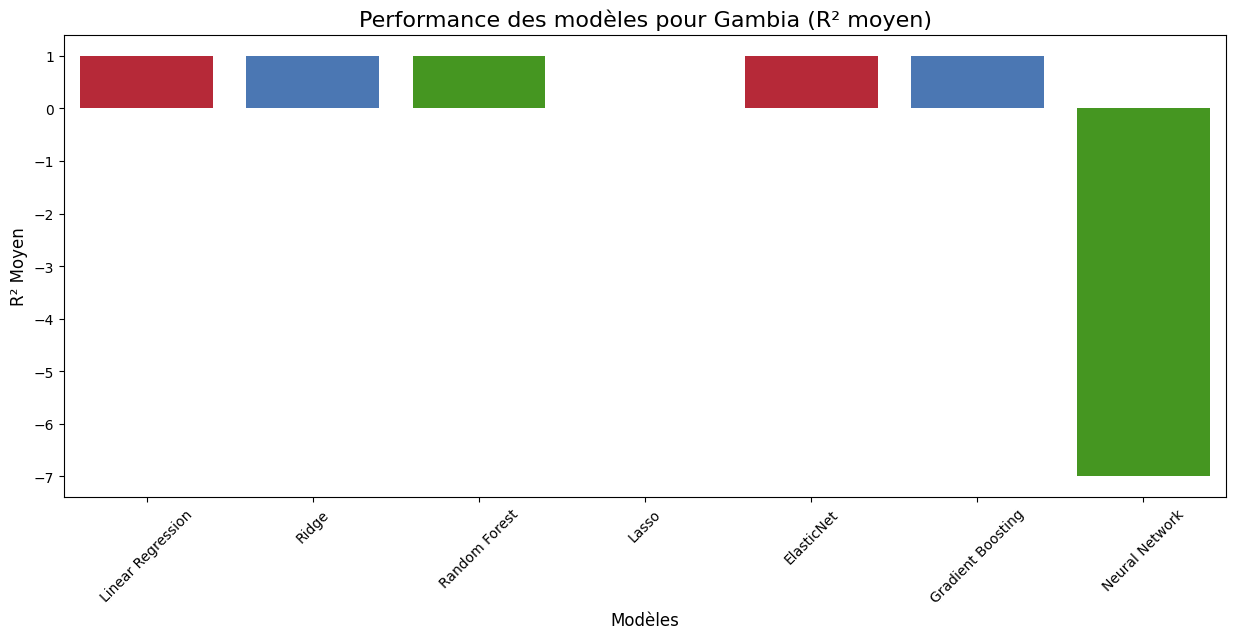

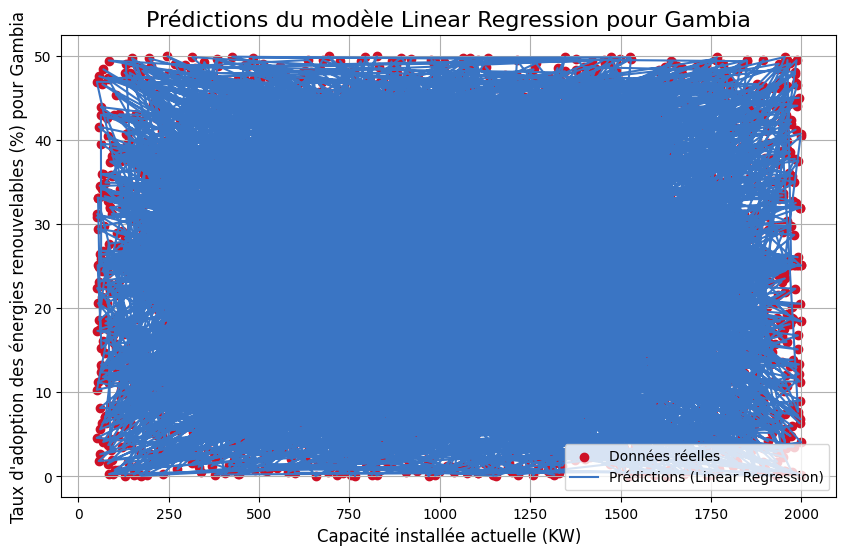

Analyse en cours pour le pays : Cape Verde


<ipython-input-35-43da7ca65723>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.dropna(subset=[
<ipython-input-35-43da7ca65723>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['taux_adoption_energies_renouvelables'] = y


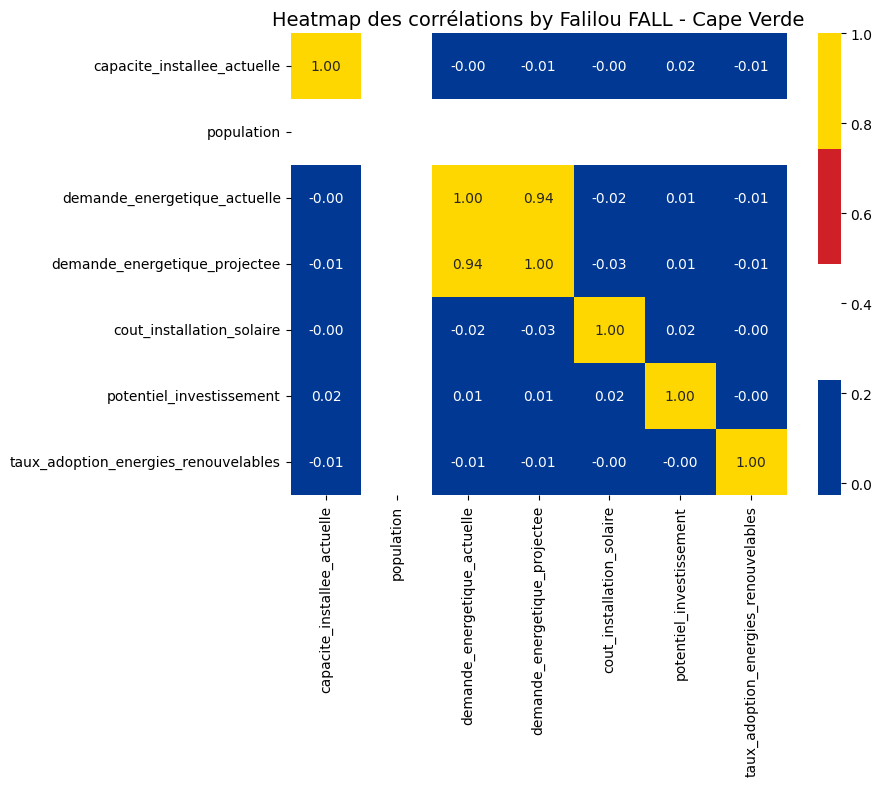

               Model      MSE Mean       MSE Std   R2 Mean        R2 Std
3  Linear Regression  1.139393e-25  1.458057e-25  1.000000  0.000000e+00
1              Ridge  5.364078e-10  3.656309e-11  1.000000  6.297731e-14
2              Lasso  1.595067e-04  2.601575e-04  0.999999  1.484377e-06
5         ElasticNet  1.595957e-04  2.602705e-04  0.999999  1.485024e-06
0      Random Forest  2.364484e-04  3.493464e-05  0.999999  1.818520e-07
4  Gradient Boosting  2.616039e-03  2.271472e-04  0.999986  1.043874e-06
6     Neural Network  3.108719e+02  1.828772e+02 -0.737354  1.076136e+00


<ipython-input-35-43da7ca65723>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-35-43da7ca65723>:97: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


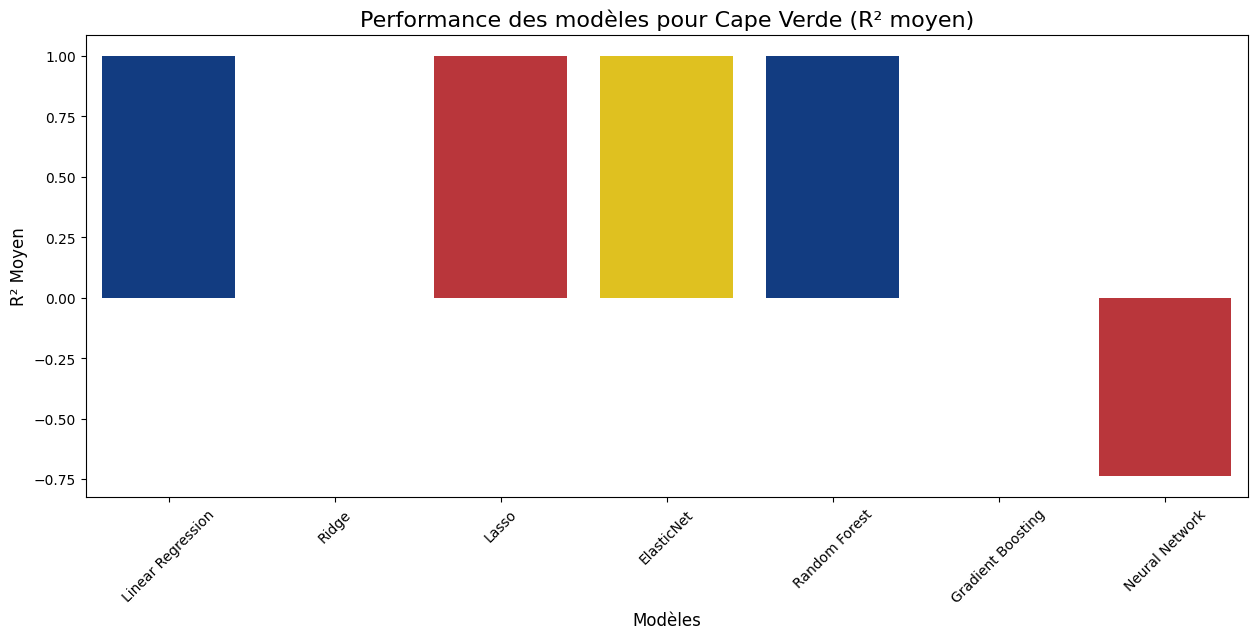

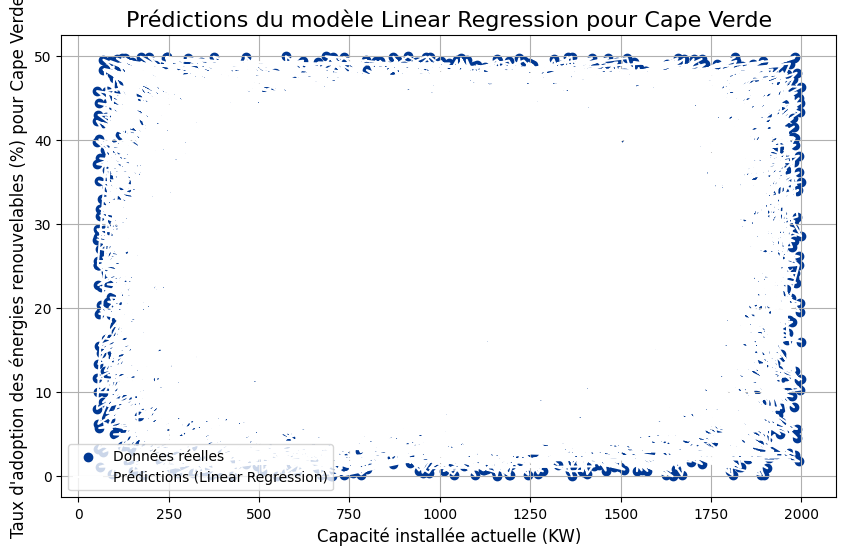

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des pays à analyser
countries = ['Benin', 'Burkina Faso', "Côte d'Ivoire", 'Guinea-Bissau', 'Mali',
             'Niger', 'Senegal', 'Togo', 'Guinea', 'Mauritania', 'Gambia', 'Cape Verde']

# Couleurs pour chaque pays
country_colors = {
    'Benin': ['#008751', '#FFD700', '#FF0000'],
    'Burkina Faso': ['#CE1126', '#009739', '#FFD700'],
    "Côte d'Ivoire": ['#F77F00', '#FFFFFF', '#009E60'],
    'Guinea-Bissau': ['#CE1126', '#FFD700', '#009739'],
    'Mali': ['#14B53A', '#FFD700', '#CE1126'],
    'Niger': ['#E05206', '#FFFFFF', '#008751'],
    'Senegal': ['#00853F', '#FFD700', '#E31B23'],
    'Togo': ['#006A4E', '#FFD700', '#D21034', '#FFFFFF'],
    'Guinea': ['#CE1126', '#FCD116', '#009460'],
    'Mauritania': ['#007A5E', '#FFD700', '#D21034'],
    'Gambia': ['#CE1126', '#3A75C4', '#3EAA0D', '#FFFFFF'],
    'Cape Verde': ['#003893', '#FFFFFF', '#CF2027', '#FFD700']
}

# Boucle par pays
for country in countries:
    print(f"Analyse en cours pour le pays : {country}")

    # Filtre des données par pays
    country_data = data_energy_uemoa[data_energy_uemoa['country'] == country]

    # Géstion des valeurs manquantes
    country_data.dropna(subset=[
        'capacite_installee_actuelle',
        'population',
        'taux_adoption_energies_renouvelables'
    ], inplace=True)

    # Vérification si les données sont suffisantes
    if country_data.shape[0] < 10:
        print(f"Données insuffisantes pour {country}, analyse ignorée.")
        continue

    # Sélection des variables explicatives et la cible
    X = country_data[['capacite_installee_actuelle', 'population', 'demande_energetique_actuelle',
                      'demande_energetique_projectee', 'cout_installation_solaire', 'potentiel_investissement']]
    y = country_data['taux_adoption_energies_renouvelables']

    # Ajout de la variable cible dans les corrélations
    X['taux_adoption_energies_renouvelables'] = y

    # Création d'un heatmap des corrélations, y compris la variable cible et population
    plt.figure(figsize=(8, 6))
    corr_matrix = X.corr()
    sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette(country_colors[country]), fmt=".2f")
    plt.title(f"Heatmap des corrélations by Falilou FALL - {country}", fontsize=14)
    plt.show()

    # Initialisation des modèles
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.01),
        'Linear Regression': LinearRegression(),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=4, random_state=42),
        'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.7, random_state=42),
        'Neural Network': MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, activation='relu', random_state=42)
    }

    # Validation croisée
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    for name, model in models.items():
        # Calcul des scores
        mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
        r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
        results.append({
            'Model': name,
            'MSE Mean': mse_scores.mean(),
            'MSE Std': mse_scores.std(),
            'R2 Mean': r2_scores.mean(),
            'R2 Std': r2_scores.std()
        })

    # Résultats sous forme de DataFrame
    results_df = pd.DataFrame(results).sort_values(by='R2 Mean', ascending=False)
    print(results_df)

    # Visualisation des performances
    plt.figure(figsize=(15, 6))
    sns.barplot(
        x='Model',
        y='R2 Mean',
        data=results_df,
        palette=country_colors[country][:len(results_df['Model'])]
    )
    plt.title(f"Performance des modèles pour {country} (R² moyen)", fontsize=16)
    plt.xlabel("Modèles", fontsize=12)
    plt.ylabel("R² Moyen", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

    # Sélection du meilleur modèle
    best_model_name = results_df.iloc[0]['Model']
    best_model = models[best_model_name]
    best_model.fit(X, y)
    y_pred = best_model.predict(X)

    # Visualisation des prédictions
    plt.figure(figsize=(10, 6))
    plt.scatter(
        X['capacite_installee_actuelle'], y,
        color=country_colors[country][0], label="Données réelles"
    )
    plt.plot(
        X['capacite_installee_actuelle'], y_pred,
        color=country_colors[country][1], label=f"Prédictions ({best_model_name})"
    )
    plt.title(f"Prédictions du modèle {best_model_name} pour {country}", fontsize=16)
    plt.xlabel("Capacité installée actuelle (KW)", fontsize=12)
    plt.ylabel(f"Taux d'adoption des énergies renouvelables (%) pour {country}", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()


###### 1.2 - Étude de la capacité installée actuelle pour prévoir les investissements nécessaires et leurs impacts économiques et environnementaux.

###### 1.1.2 Potentiel d'investissement et stabilité politique :
- Évaluation des liens entre stabilité politique et investissements énergétiques pour établir des recommandations sur la sécurité et la rentabilité des projets.


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold


# Liste des pays
countries = ['Benin', 'Burkina Faso', "Côte d'Ivoire", 'Guinea-Bissau', 'Mali', 'Niger',
             'Senegal', 'Togo', 'Guinea', 'Mauritania', 'Gambia', 'Cape Verde']

# Modèles à tester
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.7, random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(30, 30), max_iter=500, activation='relu', random_state=42),
    'SVR': SVR(kernel='linear', C=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42)
}

# Boucle sur chaque pays
for country in countries:
    # Sélection des données pour le pays
    country_data = data_energy_uemoa[data_energy_uemoa['country'] == country]

    # Vérification si les données existent pour le pays
    if country_data.empty:
        print(f"Pas de données pour {country}")
        continue

    # Variables explicatives et cible
    X = country_data[['stabilite_politique', 'potentiel_investissement']]
    y = country_data['taux_adoption_energies_renouvelables']

    # Validation croisée
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    for name, model in models.items():
        mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
        r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
        results.append({
            'Model': name,
            'MSE': mse_scores.mean(),
            'R2': r2_scores.mean()
        })

    # Résultats sous forme de DataFrame
    results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)

    # Visualisation des métriques
    plt.figure(figsize=(16, 8))
    sns.barplot(x='Model', y='R2', data=results_df, palette='coolwarm')
    plt.title(f'Comparaison des Modèles par R² pour {country}', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('R²', fontsize=12)
    plt.xlabel('Modèles', fontsize=12)
    plt.show()

    # Sélection du meilleur modèle
    best_model_name = results_df.iloc[0]['Model']
    best_model = models[best_model_name]
    best_model.fit(X, y)

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=X['stabilite_politique'], y=y, color='blue', label='Données réelles', s=50)
    sns.lineplot(x=X['stabilite_politique'], y=best_model.predict(X), color='red',
                 label=f"Prédictions ({best_model_name})", linewidth=2)
    plt.title(f"Relation entre Stabilité Politique et Adoption des Énergies Renouvelables ({country})", fontsize=16)
    plt.xlabel("Stabilité Politique", fontsize=12)
    plt.ylabel("Taux d'Adoption", fontsize=12)
    plt.legend()
    plt.show()

    # Analyse des résidus
    y_pred = best_model.predict(X)
    residuals = y - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='orange', bins=20)
    plt.title(f'Distribution des Résidus pour {country}', fontsize=14)
    plt.xlabel('Résidus', fontsize=12)
    plt.ylabel('Fréquence', fontsize=12)
    plt.show()

    # Matrice de corrélation
    plt.figure(figsize=(8, 6))
    correlation = country_data[['stabilite_politique', 'potentiel_investissement',
                                'taux_adoption_energies_renouvelables']].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title(f'Matrice de Corrélation pour {country}', fontsize=14)
    plt.show()
